In [1]:
import pandas as pd
import librosa
import os 
import numpy as np
import IPython.display as ipd

C:\Users\ninja\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [201]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 24C6-591C

 Directory of C:\Users\ninja\Desktop\datasets

04.01.2023  20:36    <DIR>          .
04.01.2023  20:36    <DIR>          ..
25.12.2022  19:44    <DIR>          .ipynb_checkpoints
25.12.2022  10:02    <DIR>          6 pervaneli
24.12.2022  20:06    <DIR>          bebop
25.12.2022  01:38    <DIR>          drone 4 kanat
28.12.2022  01:19    <DIR>          drone_4_not_in
25.12.2022  11:34           299.401 drone_datas.csv
28.12.2022  01:15         1.014.789 drone_day_25.ipynb
26.12.2022  23:22        13.512.144 droning.wav
26.12.2022  20:55       183.754.465 hepsi_drone.npy
28.12.2022  01:14    <DIR>          jackal
25.12.2022  00:45           180.676 jackal_noisy26.wav
25.12.2022  09:43    <DIR>          membo
25.12.2022  13:03           871.561 sade_df.csv
25.12.2022  19:16           363.248 sade_numpy.npy
26.12.2022  00:54    <DIR>          saved_models
04.01.2023  20:36         1.580.274 sunuming.ipynb
25.12.2022  01:

In [300]:
sade_numpy=np.load("sade_numpy.npy",allow_pickle=True)

In [301]:
sade_numpy.shape

(2066, 2)

In [302]:
df = pd.DataFrame(sade_numpy, columns=['label', 'feature'])

In [303]:
df

,label,feature
0,4,"[-148.22943, 68.812645, 48.022465, -5.9262795,..."
1,4,"[47.729355, -4.7016134, 0.09812409, 9.17263, 4..."
2,4,"[-226.84262, 182.08871, -69.25542, -9.429601, ..."
3,4,"[74.04281, 2.0522408, -1.3516281, 1.396056, -3..."
4,4,"[-36.58694, 90.487755, -21.966702, 11.880893, ..."
...,...,...
2061,0,"[-306.02847, 202.53732, -54.138206, 1.4032874,..."
2062,0,"[-284.5141, 198.9869, -44.732407, 1.5676112, -..."
2063,0,"[-120.90532, 123.900475, 4.218556, 18.608982, ..."
2064,0,"[70.5716, -0.19014108, -2.781077, 3.9726536, -..."


In [333]:
X=np.array(df["feature"].tolist())
y=np.array(df["label"].tolist())

In [334]:
X.shape

(2066, 30)

In [335]:
y.shape

(2066,)

In [336]:
y=np.array(pd.get_dummies(y))

In [337]:
y[0]

array([0, 0, 0, 0, 1], dtype=uint8)

In [338]:
X[1121]

array([-264.48355   ,   60.696762  ,  -29.90287   ,   88.67298   ,
        -17.9296    ,   58.190067  ,  -12.880671  ,   30.213432  ,
         -0.88945323,   20.569517  ,   17.559404  ,   17.93423   ,
         34.16649   ,   -2.3111835 ,    5.828809  ,  -19.330545  ,
         10.707152  ,   -2.1874733 ,   -1.9437084 ,  -12.270068  ,
          7.0085993 ,   30.222612  ,   22.357374  ,    9.822497  ,
        -12.403093  ,    1.6400074 ,  -17.16472   ,   -7.521358  ,
          0.6878459 ,    8.977596  ], dtype=float32)

In [339]:
y[1121]

array([0, 0, 0, 1, 0], dtype=uint8)

In [340]:
len(X)

2066

In [341]:
len(y)

2066

In [342]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [343]:
X_train.shape

(1652, 30)

In [344]:
X_test[1]

array([-105.21654  ,  110.02362  ,  -24.275063 ,   22.636913 ,
         -4.261756 ,   18.044247 ,   -3.3897614,    6.5332046,
         -3.4038248,   18.558573 ,  -10.7333975,   12.204937 ,
        -11.696437 ,    2.340993 ,   -9.5872345,    4.1308365,
        -13.36378  ,   -3.3262563,  -13.909905 ,    5.033458 ,
         -2.3925667,   13.36773  ,   -0.6795181,    9.332188 ,
         -4.791601 ,   -2.7796454,  -10.597589 ,   -4.241309 ,
         -3.7152913,   -3.8419585], dtype=float32)

In [345]:
y_train.shape

(1652, 5)

In [346]:
y_test.shape

(414, 5)

In [347]:
X_test.shape

(414, 30)

In [348]:
y_test.shape

(414, 5)

In [320]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [321]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [224]:
num_labels=y.shape[1]

In [225]:
model=Sequential()# sequential model:
#input layer
model.add(Dense(100,input_shape=(30,)))#100 tane nöron ; input shape :30(feature sayımız)
model.add(Activation('relu'))
model.add(Dropout(0.5))#ezberlemesini engellemek için unutma katmanı koyuyoruz.

#first layer
model.add(Dense(200))#200 nöron
model.add(Activation('relu'))
model.add(Dropout(0.5))
#second layer
model.add(Dense(100))#100 nöron
model.add(Activation('relu'))
model.add(Dropout(0.5))

#output layer
model.add(Dense(num_labels))#5 çıkış olmalı 5 sınıf olduğu için
model.add(Activation('softmax'))# softmax yapıyoruz çünkü sınıfların o olma olasılıksal dağılımını bize veriyor.

In [226]:
# Model tanımı
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 100)               3100      
                                                                 
 activation_47 (Activation)  (None, 100)               0         
                                                                 
 dropout_42 (Dropout)        (None, 100)               0         
                                                                 
 dense_53 (Dense)            (None, 200)               20200     
                                                                 
 activation_48 (Activation)  (None, 200)               0         
                                                                 
 dropout_43 (Dropout)        (None, 200)               0         
                                                                 
 dense_54 (Dense)            (None, 100)             

In [227]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
#

In [228]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 64

checkpointer = ModelCheckpoint(filepath='saved_models/drone_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
 1/26 [>.............................] - ETA: 8s - loss: 48.0948 - accuracy: 0.2344
Epoch 1: val_loss improved from inf to 1.20753, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 1s 7ms/step - loss: 20.8686 - accuracy: 0.3287 - val_loss: 1.2075 - val_accuracy: 0.6787
Epoch 2/200
 1/26 [>.............................] - ETA: 0s - loss: 9.6195 - accuracy: 0.3281
Epoch 2: val_loss improved from 1.20753 to 0.65640, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 7.1281 - accuracy: 0.4268 - val_loss: 0.6564 - val_accuracy: 0.7367
Epoch 3/200
 1/26 [>.............................] - ETA: 0s - loss: 5.9805 - accuracy: 0.4531
Epoch 3: val_loss improved from 0.65640 to 0.56591, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 4ms/step - loss: 4.3145 - accuracy: 0.4746 - val_loss: 0.5659 - val_accuracy: 0.7947
Epoch 4/2

Epoch 26/200
 1/26 [>.............................] - ETA: 0s - loss: 0.3816 - accuracy: 0.8906
Epoch 26: val_loss improved from 0.26251 to 0.25625, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8620 - val_loss: 0.2562 - val_accuracy: 0.8865
Epoch 27/200
 1/26 [>.............................] - ETA: 0s - loss: 0.4378 - accuracy: 0.8750
Epoch 27: val_loss improved from 0.25625 to 0.24897, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.4825 - accuracy: 0.8456 - val_loss: 0.2490 - val_accuracy: 0.8792
Epoch 28/200
 1/26 [>.............................] - ETA: 0s - loss: 0.3727 - accuracy: 0.8594
Epoch 28: val_loss improved from 0.24897 to 0.24482, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8571 - val_loss: 0.2448 - val_accuracy: 0.8792
E

Epoch 52/200
 1/26 [>.............................] - ETA: 0s - loss: 0.3112 - accuracy: 0.8906
Epoch 52: val_loss did not improve from 0.13920
26/26 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.9104 - val_loss: 0.1414 - val_accuracy: 0.9517
Epoch 53/200
 1/26 [>.............................] - ETA: 0s - loss: 0.2376 - accuracy: 0.8750
Epoch 53: val_loss improved from 0.13920 to 0.13857, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.2356 - accuracy: 0.9080 - val_loss: 0.1386 - val_accuracy: 0.9541
Epoch 54/200
26/26 [==============================] - ETA: 0s - loss: 0.2491 - accuracy: 0.9159
Epoch 54: val_loss improved from 0.13857 to 0.13554, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 4ms/step - loss: 0.2491 - accuracy: 0.9159 - val_loss: 0.1355 - val_accuracy: 0.9589
Epoch 55/200
 1/26 [>.............................] - ETA: 0s

 1/26 [>.............................] - ETA: 0s - loss: 0.2140 - accuracy: 0.9219
Epoch 79: val_loss did not improve from 0.11198
26/26 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9292 - val_loss: 0.1207 - val_accuracy: 0.9493
Epoch 80/200
 1/26 [>.............................] - ETA: 0s - loss: 0.2146 - accuracy: 0.9062
Epoch 80: val_loss did not improve from 0.11198
26/26 [==============================] - 0s 3ms/step - loss: 0.1722 - accuracy: 0.9322 - val_loss: 0.1123 - val_accuracy: 0.9638
Epoch 81/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1903 - accuracy: 0.9375
Epoch 81: val_loss did not improve from 0.11198
26/26 [==============================] - 0s 3ms/step - loss: 0.1834 - accuracy: 0.9268 - val_loss: 0.1170 - val_accuracy: 0.9662
Epoch 82/200
 1/26 [>.............................] - ETA: 0s - loss: 0.2724 - accuracy: 0.9531
Epoch 82: val_loss did not improve from 0.11198
26/26 [==============================] - 0s 3ms/st

26/26 [==============================] - 0s 3ms/step - loss: 0.1442 - accuracy: 0.9443 - val_loss: 0.0920 - val_accuracy: 0.9710
Epoch 108/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1034 - accuracy: 0.9688
Epoch 108: val_loss did not improve from 0.09198
26/26 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.9492 - val_loss: 0.0944 - val_accuracy: 0.9734
Epoch 109/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1125 - accuracy: 0.9375
Epoch 109: val_loss did not improve from 0.09198
26/26 [==============================] - 0s 3ms/step - loss: 0.1486 - accuracy: 0.9443 - val_loss: 0.0949 - val_accuracy: 0.9662
Epoch 110/200
 1/26 [>.............................] - ETA: 0s - loss: 0.2164 - accuracy: 0.9062
Epoch 110: val_loss improved from 0.09198 to 0.09092, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.1441 - accuracy: 0.9473 - val_loss: 0.0909 - val_acc

26/26 [==============================] - 0s 3ms/step - loss: 0.1390 - accuracy: 0.9516 - val_loss: 0.0917 - val_accuracy: 0.9686
Epoch 137/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1731 - accuracy: 0.9219
Epoch 137: val_loss did not improve from 0.08502
26/26 [==============================] - 0s 3ms/step - loss: 0.1409 - accuracy: 0.9504 - val_loss: 0.0948 - val_accuracy: 0.9710
Epoch 138/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1107 - accuracy: 0.9844
Epoch 138: val_loss improved from 0.08502 to 0.08350, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.1274 - accuracy: 0.9534 - val_loss: 0.0835 - val_accuracy: 0.9710
Epoch 139/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1287 - accuracy: 0.9844
Epoch 139: val_loss did not improve from 0.08350
26/26 [==============================] - 0s 3ms/step - loss: 0.1335 - accuracy: 0.9510 - val_loss: 0.1086 - val_acc

 1/26 [>.............................] - ETA: 0s - loss: 0.0579 - accuracy: 0.9844
Epoch 165: val_loss did not improve from 0.08002
26/26 [==============================] - 0s 3ms/step - loss: 0.1345 - accuracy: 0.9552 - val_loss: 0.0877 - val_accuracy: 0.9662
Epoch 166/200
 1/26 [>.............................] - ETA: 0s - loss: 0.2182 - accuracy: 0.8906
Epoch 166: val_loss did not improve from 0.08002
26/26 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.9570 - val_loss: 0.0835 - val_accuracy: 0.9734
Epoch 167/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1355 - accuracy: 0.9531
Epoch 167: val_loss did not improve from 0.08002
26/26 [==============================] - 0s 3ms/step - loss: 0.1280 - accuracy: 0.9540 - val_loss: 0.0871 - val_accuracy: 0.9686
Epoch 168/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1797 - accuracy: 0.9531
Epoch 168: val_loss did not improve from 0.08002
26/26 [==============================] - 0s

26/26 [==============================] - 0s 3ms/step - loss: 0.1090 - accuracy: 0.9564 - val_loss: 0.0742 - val_accuracy: 0.9734
Epoch 195/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0908 - accuracy: 0.9688
Epoch 195: val_loss did not improve from 0.07423
26/26 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9564 - val_loss: 0.0879 - val_accuracy: 0.9662
Epoch 196/200
 1/26 [>.............................] - ETA: 0s - loss: 0.2121 - accuracy: 0.8906
Epoch 196: val_loss did not improve from 0.07423
26/26 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.9552 - val_loss: 0.1111 - val_accuracy: 0.9565
Epoch 197/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1051 - accuracy: 0.9688
Epoch 197: val_loss did not improve from 0.07423
26/26 [==============================] - 0s 3ms/step - loss: 0.1176 - accuracy: 0.9552 - val_loss: 0.1067 - val_accuracy: 0.9686
Epoch 198/200
 1/26 [>........................

In [229]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9685990214347839


In [230]:
num_classes=5

In [235]:
from sklearn.metrics import multilabel_confusion_matrix

# Calculate the predicted values for the test set
y_pred = model.predict(X_test)

# Convert the predicted values to a binary array
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = multilabel_confusion_matrix(y_test, y_pred_binary)


13/13 [==============================] - 0s 912us/step


In [236]:
cm

array([[[396,   0],
        [  3,  15]],

       [[289,   1],
        [  0, 124]],

       [[378,   0],
        [  8,  28]],

       [[278,   0],
        [  2, 134]],

       [[302,  12],
        [  0, 100]]], dtype=int64)

In [244]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

13/13 [==============================] - 0s 997us/step
[[ 15   0   0   0   3]
 [  0 124   0   0   0]
 [  0   0  28   0   8]
 [  0   1   0 134   1]
 [  0   0   0   0 100]]


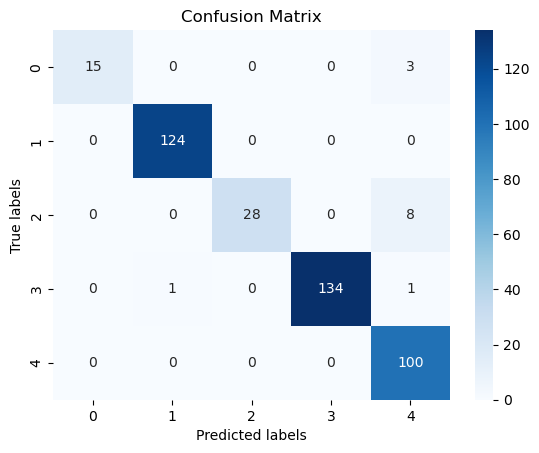

In [245]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and a subplot
fig, ax = plt.subplots()

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Add labels to the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [246]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.99      1.00      1.00       124
           2       1.00      0.78      0.88        36
           3       1.00      0.99      0.99       136
           4       0.89      1.00      0.94       100

    accuracy                           0.97       414
   macro avg       0.98      0.92      0.94       414
weighted avg       0.97      0.97      0.97       414



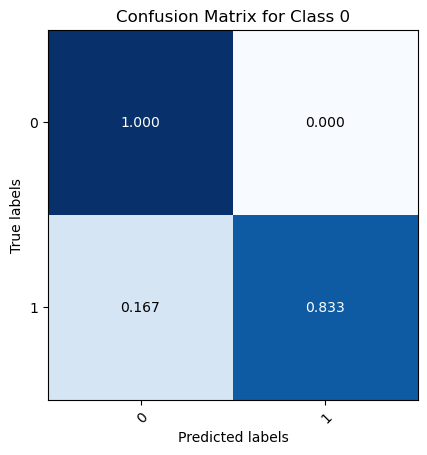

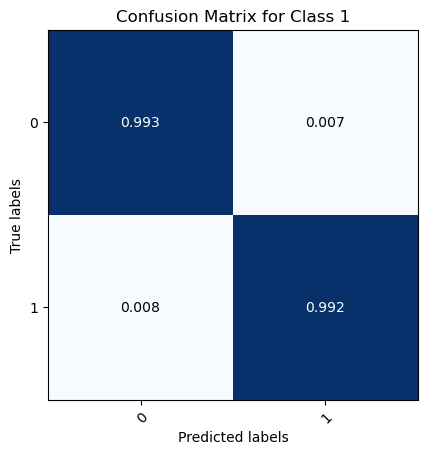

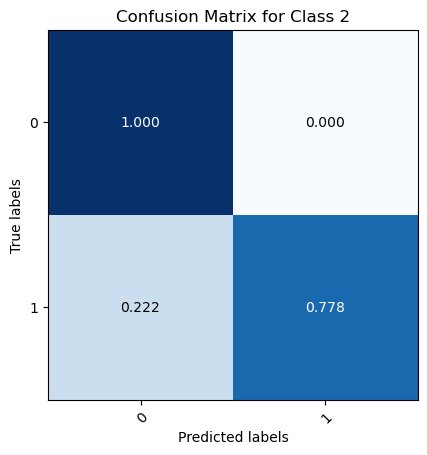

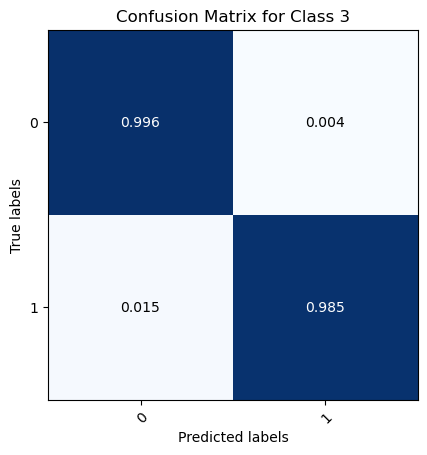

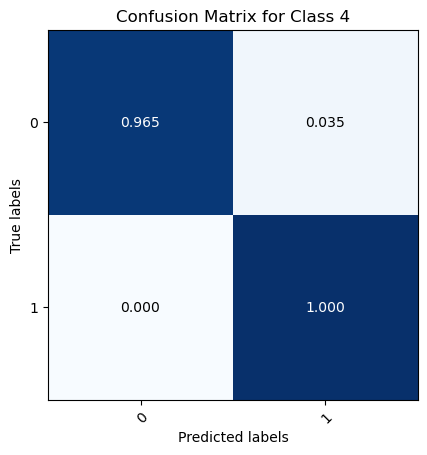

In [33]:
import matplotlib.pyplot as plt

num_classes = cm.shape[0]

for i in range(num_classes):
    # Normalize the confusion matrix
    cm_normalized = cm[i].astype('float') / cm[i].sum(axis=1)[:, np.newaxis]

    # Create a figure and a subplot
    fig, ax = plt.subplots()

    # Create a heatmap from the confusion matrix
    im = ax.imshow(cm_normalized, cmap=plt.cm.Blues)

    # Add labels to the plot
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix for Class {}'.format(i))

    # Add ticks to the plot
    ax.set_xticks(np.arange(cm_normalized.shape[1]))
    ax.set_yticks(np.arange(cm_normalized.shape[0]))

    # Add labels to the ticks
    ax.set_xticklabels(np.arange(cm_normalized.shape[1]))
    ax.set_yticklabels(np.arange(cm_normalized.shape[0]))

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    # Loop over data dimensions and create text annotations
    for j in range(cm_normalized.shape[0]):
        for k in range(cm_normalized.shape[1]):
            ax.text(k, j, format(cm_normalized[j, k], '.3f'), ha='center', va='center', color='white' if cm_normalized[j, k] > 0.5 else 'black')

    # Show the plot
    plt.show()


In [267]:
model=Sequential()# sequential model:
#input layer
model.add(Dense(100,input_shape=(30,)))#100 tane nöron ; input shape :30(feature sayımız)
model.add(Activation('tanh'))
model.add(Dropout(0.5))#ezberlemesini engellemek için unutma katmanı koyuyoruz.

#first layer
model.add(Dense(200))#200 nöron
model.add(Activation('tanh'))
model.add(Dropout(0.5))
#second layer
model.add(Dense(100))#100 nöron
model.add(Activation('tanh'))
model.add(Dropout(0.5))

#output layer
model.add(Dense(num_labels))#5 çıkış olmalı 5 sınıf olduğu için
model.add(Activation('softmax'))# softmax yapıyoruz çünkü sınıfların o olma olasılıksal dağılımını bize veriyor.

In [268]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 100)               3100      
                                                                 
 activation_55 (Activation)  (None, 100)               0         
                                                                 
 dropout_48 (Dropout)        (None, 100)               0         
                                                                 
 dense_61 (Dense)            (None, 200)               20200     
                                                                 
 activation_56 (Activation)  (None, 200)               0         
                                                                 
 dropout_49 (Dropout)        (None, 200)               0         
                                                                 
 dense_62 (Dense)            (None, 100)             

In [269]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
#

In [270]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 64

checkpointer = ModelCheckpoint(filepath='saved_models/drone_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
 1/26 [>.............................] - ETA: 8s - loss: 2.2315 - accuracy: 0.1719
Epoch 1: val_loss improved from inf to 0.65053, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 1s 7ms/step - loss: 1.2521 - accuracy: 0.5387 - val_loss: 0.6505 - val_accuracy: 0.8043
Epoch 2/200
 1/26 [>.............................] - ETA: 0s - loss: 1.1734 - accuracy: 0.6562
Epoch 2: val_loss improved from 0.65053 to 0.46321, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 4ms/step - loss: 0.7586 - accuracy: 0.7470 - val_loss: 0.4632 - val_accuracy: 0.8527
Epoch 3/200
 1/26 [>.............................] - ETA: 0s - loss: 0.7479 - accuracy: 0.7969
Epoch 3: val_loss improved from 0.46321 to 0.34300, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 4ms/step - loss: 0.6058 - accuracy: 0.7942 - val_loss: 0.3430 - val_accuracy: 0.8647
Epoch 4/200

Epoch 28/200
 1/26 [>.............................] - ETA: 0s - loss: 0.3102 - accuracy: 0.8438
Epoch 28: val_loss improved from 0.11564 to 0.10610, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 4ms/step - loss: 0.1877 - accuracy: 0.9358 - val_loss: 0.1061 - val_accuracy: 0.9614
Epoch 29/200
24/26 [==========================>...] - ETA: 0s - loss: 0.1885 - accuracy: 0.9303
Epoch 29: val_loss did not improve from 0.10610
26/26 [==============================] - 0s 3ms/step - loss: 0.1911 - accuracy: 0.9280 - val_loss: 0.1092 - val_accuracy: 0.9589
Epoch 30/200
24/26 [==========================>...] - ETA: 0s - loss: 0.1897 - accuracy: 0.9238
Epoch 30: val_loss did not improve from 0.10610
26/26 [==============================] - 0s 3ms/step - loss: 0.1947 - accuracy: 0.9231 - val_loss: 0.1184 - val_accuracy: 0.9589
Epoch 31/200
 1/26 [>.............................] - ETA: 0s - loss: 0.2493 - accuracy: 0.9375
Epoch 31: val_loss improv

Epoch 57/200
26/26 [==============================] - ETA: 0s - loss: 0.1531 - accuracy: 0.9395
Epoch 57: val_loss did not improve from 0.08872
26/26 [==============================] - 0s 3ms/step - loss: 0.1531 - accuracy: 0.9395 - val_loss: 0.1044 - val_accuracy: 0.9589
Epoch 58/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0766 - accuracy: 0.9844
Epoch 58: val_loss did not improve from 0.08872
26/26 [==============================] - 0s 3ms/step - loss: 0.1544 - accuracy: 0.9437 - val_loss: 0.0979 - val_accuracy: 0.9589
Epoch 59/200
 1/26 [>.............................] - ETA: 0s - loss: 0.2150 - accuracy: 0.9062
Epoch 59: val_loss did not improve from 0.08872
26/26 [==============================] - 0s 3ms/step - loss: 0.1546 - accuracy: 0.9425 - val_loss: 0.0898 - val_accuracy: 0.9710
Epoch 60/200
 1/26 [>.............................] - ETA: 0s - loss: 0.3124 - accuracy: 0.8750
Epoch 60: val_loss did not improve from 0.08872
26/26 [==============================

Epoch 87/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0781 - accuracy: 0.9688
Epoch 87: val_loss did not improve from 0.08673
26/26 [==============================] - 0s 3ms/step - loss: 0.1579 - accuracy: 0.9395 - val_loss: 0.0943 - val_accuracy: 0.9614
Epoch 88/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0820 - accuracy: 0.9688
Epoch 88: val_loss did not improve from 0.08673
26/26 [==============================] - 0s 3ms/step - loss: 0.1607 - accuracy: 0.9419 - val_loss: 0.0930 - val_accuracy: 0.9662
Epoch 89/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1232 - accuracy: 0.9375
Epoch 89: val_loss improved from 0.08673 to 0.08395, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.1374 - accuracy: 0.9467 - val_loss: 0.0839 - val_accuracy: 0.9710
Epoch 90/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1175 - accuracy: 0.9375
Epoch 90: val_loss improv

26/26 [==============================] - 0s 3ms/step - loss: 0.1319 - accuracy: 0.9564 - val_loss: 0.0812 - val_accuracy: 0.9710
Epoch 116/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0689 - accuracy: 0.9844
Epoch 116: val_loss did not improve from 0.07879
26/26 [==============================] - 0s 3ms/step - loss: 0.1308 - accuracy: 0.9528 - val_loss: 0.0789 - val_accuracy: 0.9710
Epoch 117/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0720 - accuracy: 0.9688
Epoch 117: val_loss improved from 0.07879 to 0.07850, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.1315 - accuracy: 0.9528 - val_loss: 0.0785 - val_accuracy: 0.9734
Epoch 118/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1790 - accuracy: 0.9219
Epoch 118: val_loss did not improve from 0.07850
26/26 [==============================] - 0s 3ms/step - loss: 0.1208 - accuracy: 0.9546 - val_loss: 0.0889 - val_acc

 1/26 [>.............................] - ETA: 0s - loss: 0.1909 - accuracy: 0.9375
Epoch 145: val_loss did not improve from 0.07850
26/26 [==============================] - 0s 3ms/step - loss: 0.1175 - accuracy: 0.9564 - val_loss: 0.0841 - val_accuracy: 0.9710
Epoch 146/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1582 - accuracy: 0.9375
Epoch 146: val_loss did not improve from 0.07850
26/26 [==============================] - 0s 3ms/step - loss: 0.1192 - accuracy: 0.9516 - val_loss: 0.0810 - val_accuracy: 0.9710
Epoch 147/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1243 - accuracy: 0.9688
Epoch 147: val_loss did not improve from 0.07850
26/26 [==============================] - 0s 3ms/step - loss: 0.1246 - accuracy: 0.9552 - val_loss: 0.0849 - val_accuracy: 0.9710
Epoch 148/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0379 - accuracy: 1.0000
Epoch 148: val_loss did not improve from 0.07850
26/26 [==============================] - 0s

Epoch 175/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1010 - accuracy: 0.9688
Epoch 175: val_loss did not improve from 0.07810
26/26 [==============================] - 0s 3ms/step - loss: 0.1166 - accuracy: 0.9576 - val_loss: 0.0784 - val_accuracy: 0.9710
Epoch 176/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1387 - accuracy: 0.9844
Epoch 176: val_loss improved from 0.07810 to 0.07612, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 3ms/step - loss: 0.1237 - accuracy: 0.9540 - val_loss: 0.0761 - val_accuracy: 0.9734
Epoch 177/200
 1/26 [>.............................] - ETA: 0s - loss: 0.1224 - accuracy: 0.9375
Epoch 177: val_loss did not improve from 0.07612
26/26 [==============================] - 0s 3ms/step - loss: 0.1192 - accuracy: 0.9540 - val_loss: 0.0776 - val_accuracy: 0.9734
Epoch 178/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0686 - accuracy: 0.9531
Epoch 178: val_los

In [271]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9710144996643066


In [80]:
from sklearn.metrics import multilabel_confusion_matrix

# Calculate the predicted values for the test set
y_pred = model.predict(X_test)

# Convert the predicted values to a binary array
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = multilabel_confusion_matrix(y_test, y_pred_binary,labels=range(num_classes))


13/13 [==============================] - 0s 831us/step


In [272]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

13/13 [==============================] - 0s 832us/step
[[ 15   0   0   0   3]
 [  0 123   0   1   0]
 [  0   0  28   0   8]
 [  0   0   0 136   0]
 [  0   0   0   0 100]]


In [273]:
y_pred_binary

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0]])

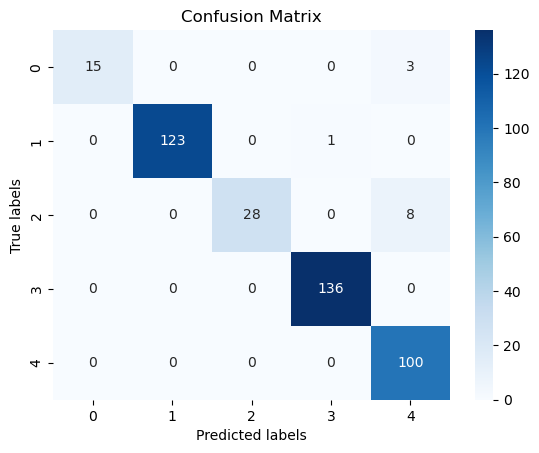

In [274]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and a subplot
fig, ax = plt.subplots()

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Add labels to the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [275]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       1.00      0.99      1.00       124
           2       1.00      0.78      0.88        36
           3       0.99      1.00      1.00       136
           4       0.90      1.00      0.95       100

    accuracy                           0.97       414
   macro avg       0.98      0.92      0.94       414
weighted avg       0.97      0.97      0.97       414



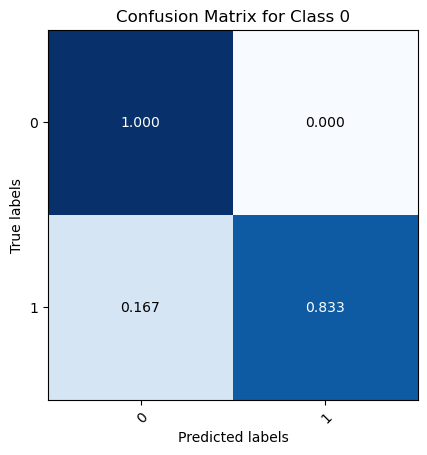

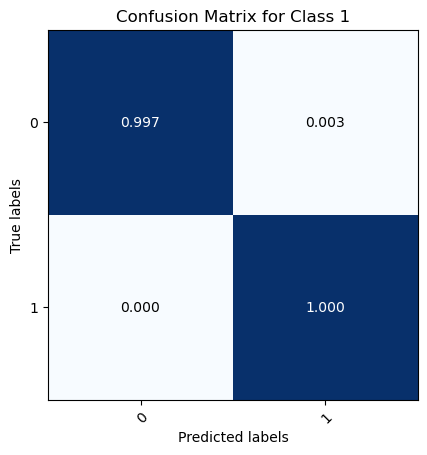

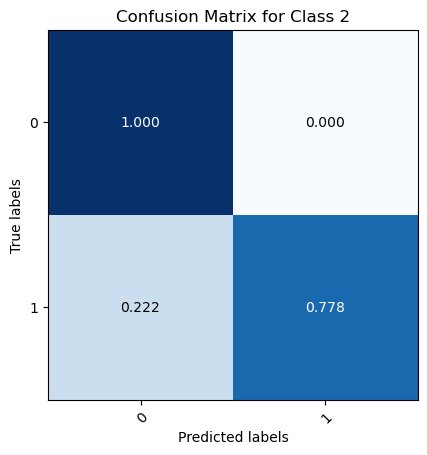

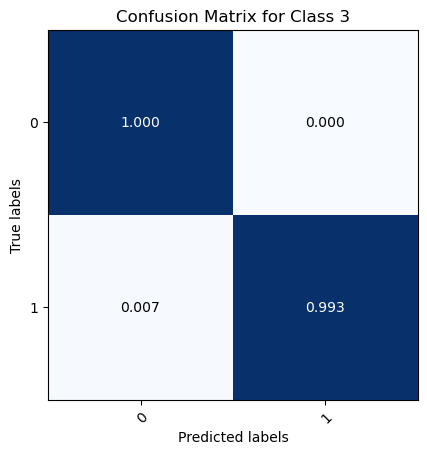

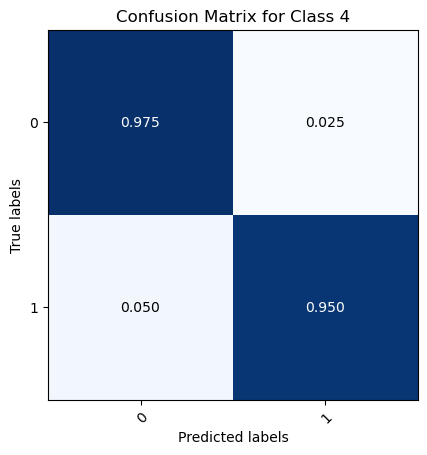

In [95]:
import matplotlib.pyplot as plt

num_classes = cm.shape[0]

for i in range(num_classes):
    # Normalize the confusion matrix
    cm_normalized = cm[i].astype('float') / cm[i].sum(axis=1)[:, np.newaxis]

    # Create a figure and a subplot
    fig, ax = plt.subplots()

    # Create a heatmap from the confusion matrix
    im = ax.imshow(cm_normalized, cmap=plt.cm.Blues)

    # Add labels to the plot
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix for Class {}'.format(i))

    # Add ticks to the plot
    ax.set_xticks(np.arange(cm_normalized.shape[1]))
    ax.set_yticks(np.arange(cm_normalized.shape[0]))

    # Add labels to the ticks
    ax.set_xticklabels(np.arange(cm_normalized.shape[1]))
    ax.set_yticklabels(np.arange(cm_normalized.shape[0]))

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    # Loop over data dimensions and create text annotations
    for j in range(cm_normalized.shape[0]):
        for k in range(cm_normalized.shape[1]):
            ax.text(k, j, format(cm_normalized[j, k], '.3f'), ha='center', va='center', color='white' if cm_normalized[j, k] > 0.5 else 'black')

    # Show the plot
    plt.show()


In [ ]:
#dropout 0.7 yapıldı bir layer daha eklendi
#input nöron sayıları 2 ile çarpıldı.

In [292]:
model=Sequential()# sequential model:
#input layer
model.add(Dense(200,input_shape=(30,)))#200 tane nöron ; input shape :30(feature sayımız)
model.add(Activation('tanh'))
model.add(Dropout(0.7))#ezberlemesini engellemek için unutma katmanı koyuyoruz.

#first layer
model.add(Dense(400))#400 nöron
model.add(Activation('tanh'))
model.add(Dropout(0.7))
#second layer
model.add(Dense(200))#200 nöron
model.add(Activation('tanh'))
model.add(Dropout(0.7))
#third layer
model.add(Dense(200))#200 nöron
model.add(Activation('tanh'))
model.add(Dropout(0.7))

#output layer
model.add(Dense(num_labels))#5 çıkış olmalı 5 sınıf olduğu için
model.add(Activation('softmax'))# softmax yapıyoruz çünkü sınıfların o olma olasılıksal dağılımını bize veriyor.

In [293]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 200)               6200      
                                                                 
 activation_59 (Activation)  (None, 200)               0         
                                                                 
 dropout_51 (Dropout)        (None, 200)               0         
                                                                 
 dense_65 (Dense)            (None, 400)               80400     
                                                                 
 activation_60 (Activation)  (None, 400)               0         
                                                                 
 dropout_52 (Dropout)        (None, 400)               0         
                                                                 
 dense_66 (Dense)            (None, 200)             

In [294]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
#

In [295]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 64

checkpointer = ModelCheckpoint(filepath='saved_models/drone_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
19/26 [====================>.........] - ETA: 0s - loss: 2.3198 - accuracy: 0.2738
Epoch 1: val_loss improved from inf to 1.50353, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 1s 9ms/step - loss: 2.2180 - accuracy: 0.2984 - val_loss: 1.5035 - val_accuracy: 0.5628
Epoch 2/200
17/26 [==================>...........] - ETA: 0s - loss: 1.7682 - accuracy: 0.3860
Epoch 2: val_loss improved from 1.50353 to 1.02023, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 5ms/step - loss: 1.7229 - accuracy: 0.4098 - val_loss: 1.0202 - val_accuracy: 0.7778
Epoch 3/200
18/26 [===================>..........] - ETA: 0s - loss: 1.5575 - accuracy: 0.4540
Epoch 3: val_loss did not improve from 1.02023
26/26 [==============================] - 0s 4ms/step - loss: 1.4945 - accuracy: 0.4740 - val_loss: 1.0291 - val_accuracy: 0.8019
Epoch 4/200
18/26 [===================>..........] - ETA: 0s - loss: 1.

19/26 [====================>.........] - ETA: 0s - loss: 0.3838 - accuracy: 0.8783
Epoch 27: val_loss improved from 0.22449 to 0.20798, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 5ms/step - loss: 0.3830 - accuracy: 0.8735 - val_loss: 0.2080 - val_accuracy: 0.9082
Epoch 28/200
16/26 [=================>............] - ETA: 0s - loss: 0.3749 - accuracy: 0.8760
Epoch 28: val_loss improved from 0.20798 to 0.19696, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 5ms/step - loss: 0.3719 - accuracy: 0.8729 - val_loss: 0.1970 - val_accuracy: 0.9106
Epoch 29/200
15/26 [================>.............] - ETA: 0s - loss: 0.3876 - accuracy: 0.8719
Epoch 29: val_loss did not improve from 0.19696
26/26 [==============================] - 0s 5ms/step - loss: 0.3759 - accuracy: 0.8711 - val_loss: 0.2286 - val_accuracy: 0.9034
Epoch 30/200
15/26 [================>.............] - ETA: 0s - loss: 0.33

18/26 [===================>..........] - ETA: 0s - loss: 0.2686 - accuracy: 0.9106
Epoch 55: val_loss did not improve from 0.12891
26/26 [==============================] - 0s 4ms/step - loss: 0.2578 - accuracy: 0.9140 - val_loss: 0.1640 - val_accuracy: 0.9541
Epoch 56/200
18/26 [===================>..........] - ETA: 0s - loss: 0.2586 - accuracy: 0.9132
Epoch 56: val_loss did not improve from 0.12891
26/26 [==============================] - 0s 4ms/step - loss: 0.2641 - accuracy: 0.9086 - val_loss: 0.1528 - val_accuracy: 0.9517
Epoch 57/200
19/26 [====================>.........] - ETA: 0s - loss: 0.2468 - accuracy: 0.9194
Epoch 57: val_loss did not improve from 0.12891
26/26 [==============================] - 0s 4ms/step - loss: 0.2612 - accuracy: 0.9104 - val_loss: 0.1383 - val_accuracy: 0.9541
Epoch 58/200
19/26 [====================>.........] - ETA: 0s - loss: 0.2430 - accuracy: 0.9169
Epoch 58: val_loss improved from 0.12891 to 0.11669, saving model to saved_models\drone_classifica

26/26 [==============================] - 0s 5ms/step - loss: 0.1904 - accuracy: 0.9377 - val_loss: 0.1129 - val_accuracy: 0.9614
Epoch 85/200
18/26 [===================>..........] - ETA: 0s - loss: 0.1963 - accuracy: 0.9306
Epoch 85: val_loss did not improve from 0.11289
26/26 [==============================] - 0s 4ms/step - loss: 0.2094 - accuracy: 0.9280 - val_loss: 0.1265 - val_accuracy: 0.9589
Epoch 86/200
18/26 [===================>..........] - ETA: 0s - loss: 0.2152 - accuracy: 0.9271
Epoch 86: val_loss did not improve from 0.11289
26/26 [==============================] - 0s 4ms/step - loss: 0.2130 - accuracy: 0.9310 - val_loss: 0.1180 - val_accuracy: 0.9589
Epoch 87/200
18/26 [===================>..........] - ETA: 0s - loss: 0.2148 - accuracy: 0.9245
Epoch 87: val_loss improved from 0.11289 to 0.11182, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 5ms/step - loss: 0.2120 - accuracy: 0.9255 - val_loss: 0.1118 - val_accuracy:

Epoch 114/200
18/26 [===================>..........] - ETA: 0s - loss: 0.1864 - accuracy: 0.9366
Epoch 114: val_loss did not improve from 0.10589
26/26 [==============================] - 0s 4ms/step - loss: 0.1915 - accuracy: 0.9328 - val_loss: 0.1092 - val_accuracy: 0.9662
Epoch 115/200
18/26 [===================>..........] - ETA: 0s - loss: 0.1816 - accuracy: 0.9384
Epoch 115: val_loss did not improve from 0.10589
26/26 [==============================] - 0s 4ms/step - loss: 0.1870 - accuracy: 0.9340 - val_loss: 0.1177 - val_accuracy: 0.9589
Epoch 116/200
18/26 [===================>..........] - ETA: 0s - loss: 0.1817 - accuracy: 0.9384
Epoch 116: val_loss did not improve from 0.10589
26/26 [==============================] - 0s 4ms/step - loss: 0.1927 - accuracy: 0.9328 - val_loss: 0.1083 - val_accuracy: 0.9638
Epoch 117/200
18/26 [===================>..........] - ETA: 0s - loss: 0.1774 - accuracy: 0.9306
Epoch 117: val_loss did not improve from 0.10589
26/26 [======================

Epoch 143/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1819 - accuracy: 0.9393
Epoch 143: val_loss did not improve from 0.09746
26/26 [==============================] - 0s 4ms/step - loss: 0.1676 - accuracy: 0.9437 - val_loss: 0.1294 - val_accuracy: 0.9565
Epoch 144/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1817 - accuracy: 0.9347
Epoch 144: val_loss did not improve from 0.09746
26/26 [==============================] - 0s 4ms/step - loss: 0.1820 - accuracy: 0.9328 - val_loss: 0.1128 - val_accuracy: 0.9662
Epoch 145/200
16/26 [=================>............] - ETA: 0s - loss: 0.2259 - accuracy: 0.9160
Epoch 145: val_loss did not improve from 0.09746
26/26 [==============================] - 0s 4ms/step - loss: 0.2039 - accuracy: 0.9249 - val_loss: 0.1092 - val_accuracy: 0.9662
Epoch 146/200
16/26 [=================>............] - ETA: 0s - loss: 0.1884 - accuracy: 0.9336
Epoch 146: val_loss did not improve from 0.09746
26/26 [======================

Epoch 173/200
18/26 [===================>..........] - ETA: 0s - loss: 0.1551 - accuracy: 0.9444
Epoch 173: val_loss did not improve from 0.09572
26/26 [==============================] - 0s 4ms/step - loss: 0.1655 - accuracy: 0.9431 - val_loss: 0.0971 - val_accuracy: 0.9686
Epoch 174/200
19/26 [====================>.........] - ETA: 0s - loss: 0.1729 - accuracy: 0.9359
Epoch 174: val_loss did not improve from 0.09572
26/26 [==============================] - 0s 4ms/step - loss: 0.1719 - accuracy: 0.9377 - val_loss: 0.1022 - val_accuracy: 0.9589
Epoch 175/200
19/26 [====================>.........] - ETA: 0s - loss: 0.1938 - accuracy: 0.9252
Epoch 175: val_loss did not improve from 0.09572
26/26 [==============================] - 0s 4ms/step - loss: 0.1890 - accuracy: 0.9292 - val_loss: 0.0996 - val_accuracy: 0.9662
Epoch 176/200
18/26 [===================>..........] - ETA: 0s - loss: 0.1591 - accuracy: 0.9505
Epoch 176: val_loss did not improve from 0.09572
26/26 [======================

In [296]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.966183602809906


In [102]:
from sklearn.metrics import multilabel_confusion_matrix

# Calculate the predicted values for the test set
y_pred = model.predict(X_test)

# Convert the predicted values to a binary array
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = multilabel_confusion_matrix(y_test, y_pred_binary,labels=range(num_classes))


13/13 [==============================] - 0s 1ms/step


In [297]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

13/13 [==============================] - 0s 1ms/step
[[ 15   0   0   0   3]
 [  0 123   0   1   0]
 [  0   0  28   0   8]
 [  0   2   0 134   0]
 [  0   0   0   0 100]]


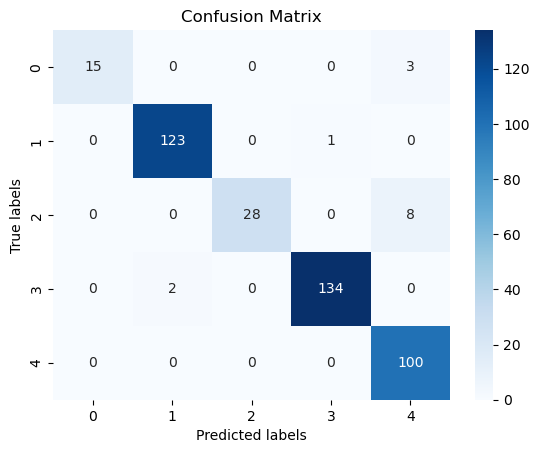

In [298]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and a subplot
fig, ax = plt.subplots()

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Add labels to the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [299]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.98      0.99      0.99       124
           2       1.00      0.78      0.88        36
           3       0.99      0.99      0.99       136
           4       0.90      1.00      0.95       100

    accuracy                           0.97       414
   macro avg       0.98      0.92      0.94       414
weighted avg       0.97      0.97      0.97       414



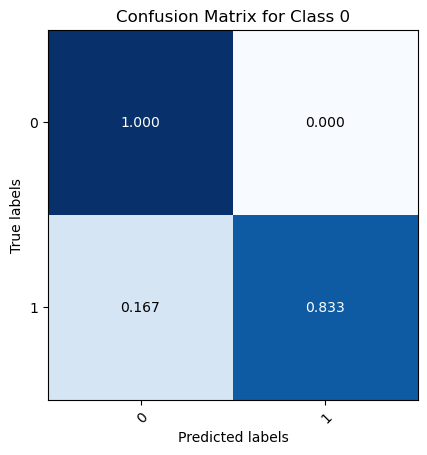

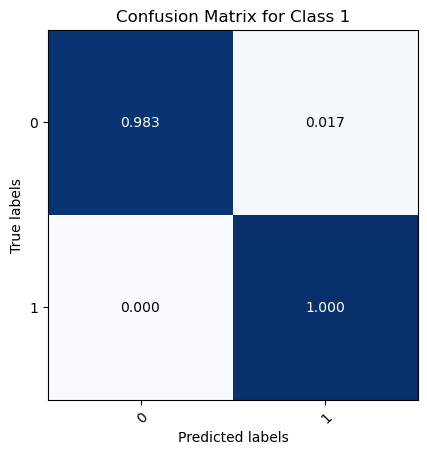

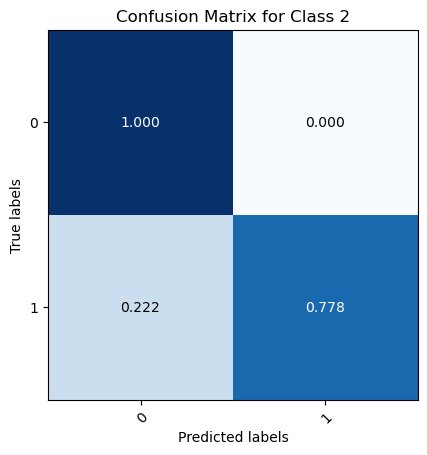

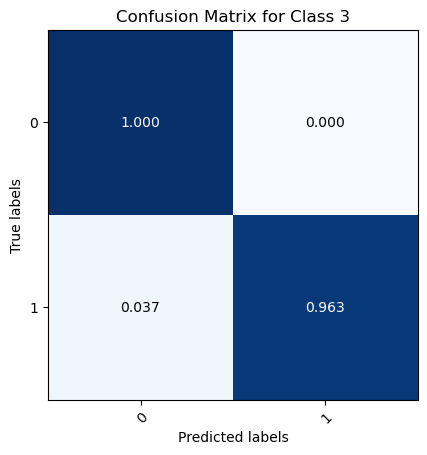

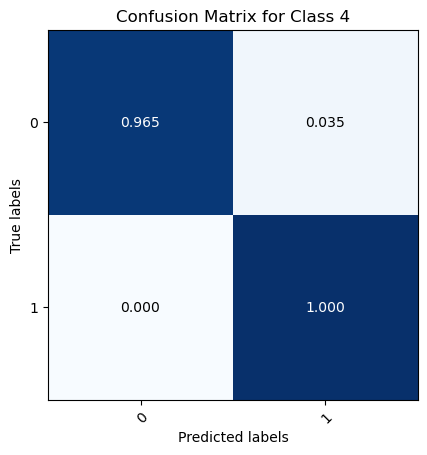

In [103]:
import matplotlib.pyplot as plt

num_classes = cm.shape[0]

for i in range(num_classes):
    # Normalize the confusion matrix
    cm_normalized = cm[i].astype('float') / cm[i].sum(axis=1)[:, np.newaxis]

    # Create a figure and a subplot
    fig, ax = plt.subplots()

    # Create a heatmap from the confusion matrix
    im = ax.imshow(cm_normalized, cmap=plt.cm.Blues)

    # Add labels to the plot
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix for Class {}'.format(i))

    # Add ticks to the plot
    ax.set_xticks(np.arange(cm_normalized.shape[1]))
    ax.set_yticks(np.arange(cm_normalized.shape[0]))

    # Add labels to the ticks
    ax.set_xticklabels(np.arange(cm_normalized.shape[1]))
    ax.set_yticklabels(np.arange(cm_normalized.shape[0]))

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    # Loop over data dimensions and create text annotations
    for j in range(cm_normalized.shape[0]):
        for k in range(cm_normalized.shape[1]):
            ax.text(k, j, format(cm_normalized[j, k], '.3f'), ha='center', va='center', color='white' if cm_normalized[j, k] > 0.5 else 'black')

    # Show the plot
    plt.show()


In [322]:
#tanh yerine relu kullandım

model=Sequential()# sequential model:
#input layer
model.add(Dense(200,input_shape=(30,)))#200 tane nöron ; input shape :30(feature sayımız)
model.add(Activation('relu'))
model.add(Dropout(0.7))#ezberlemesini engellemek için unutma katmanı koyuyoruz.

#first layer
model.add(Dense(400))#400 nöron
model.add(Activation('relu'))
model.add(Dropout(0.7))
#second layer
model.add(Dense(200))#200 nöron
model.add(Activation('relu'))
model.add(Dropout(0.7))
#third layer
model.add(Dense(200))#200 nöron
model.add(Activation('relu'))
model.add(Dropout(0.7))

#output layer
model.add(Dense(num_labels))#5 çıkış olmalı 5 sınıf olduğu için
model.add(Activation('softmax'))# softmax yapıyoruz çünkü sınıfların o olma olasılıksal dağılımını bize veriyor.

In [323]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 200)               6200      
                                                                 
 activation_64 (Activation)  (None, 200)               0         
                                                                 
 dropout_55 (Dropout)        (None, 200)               0         
                                                                 
 dense_70 (Dense)            (None, 400)               80400     
                                                                 
 activation_65 (Activation)  (None, 400)               0         
                                                                 
 dropout_56 (Dropout)        (None, 400)               0         
                                                                 
 dense_71 (Dense)            (None, 200)             

In [324]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
#

In [325]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 64

checkpointer = ModelCheckpoint(filepath='saved_models/drone_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/200
19/26 [====================>.........] - ETA: 0s - loss: 54.7513 - accuracy: 0.2664
Epoch 1: val_loss improved from inf to 1.47950, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 1s 9ms/step - loss: 47.7385 - accuracy: 0.2815 - val_loss: 1.4795 - val_accuracy: 0.4686
Epoch 2/200
18/26 [===================>..........] - ETA: 0s - loss: 22.3973 - accuracy: 0.3142
Epoch 2: val_loss improved from 1.47950 to 1.01467, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 5ms/step - loss: 20.8205 - accuracy: 0.3045 - val_loss: 1.0147 - val_accuracy: 0.7150
Epoch 3/200
18/26 [===================>..........] - ETA: 0s - loss: 14.4286 - accuracy: 0.2969
Epoch 3: val_loss did not improve from 1.01467
26/26 [==============================] - 0s 4ms/step - loss: 13.3247 - accuracy: 0.3045 - val_loss: 1.0412 - val_accuracy: 0.7874
Epoch 4/200
17/26 [==================>...........] - ETA: 0s - lo

26/26 [==============================] - 0s 6ms/step - loss: 1.1059 - accuracy: 0.6846 - val_loss: 0.8198 - val_accuracy: 0.7705
Epoch 30/200
14/26 [===============>..............] - ETA: 0s - loss: 1.0714 - accuracy: 0.7020
Epoch 30: val_loss improved from 0.81976 to 0.78750, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 5ms/step - loss: 1.0621 - accuracy: 0.6992 - val_loss: 0.7875 - val_accuracy: 0.7754
Epoch 31/200
14/26 [===============>..............] - ETA: 0s - loss: 1.0430 - accuracy: 0.6908
Epoch 31: val_loss improved from 0.78750 to 0.75907, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 6ms/step - loss: 1.0026 - accuracy: 0.7010 - val_loss: 0.7591 - val_accuracy: 0.7802
Epoch 32/200
14/26 [===============>..............] - ETA: 0s - loss: 1.0127 - accuracy: 0.6987
Epoch 32: val_loss improved from 0.75907 to 0.72996, saving model to saved_models\drone_classification.hdf5
2

26/26 [==============================] - 0s 5ms/step - loss: 0.5514 - accuracy: 0.8148 - val_loss: 0.4076 - val_accuracy: 0.8623
Epoch 55/200
15/26 [================>.............] - ETA: 0s - loss: 0.5389 - accuracy: 0.8250
Epoch 55: val_loss did not improve from 0.40761
26/26 [==============================] - 0s 5ms/step - loss: 0.5300 - accuracy: 0.8311 - val_loss: 0.4290 - val_accuracy: 0.8671
Epoch 56/200
16/26 [=================>............] - ETA: 0s - loss: 0.5285 - accuracy: 0.8203
Epoch 56: val_loss improved from 0.40761 to 0.40042, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 5ms/step - loss: 0.5320 - accuracy: 0.8172 - val_loss: 0.4004 - val_accuracy: 0.8720
Epoch 57/200
16/26 [=================>............] - ETA: 0s - loss: 0.5583 - accuracy: 0.8154
Epoch 57: val_loss improved from 0.40042 to 0.38731, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 5ms/step - loss: 

Epoch 82/200
16/26 [=================>............] - ETA: 0s - loss: 0.3524 - accuracy: 0.8789
Epoch 82: val_loss did not improve from 0.25325
26/26 [==============================] - 0s 4ms/step - loss: 0.3812 - accuracy: 0.8753 - val_loss: 0.2605 - val_accuracy: 0.9082
Epoch 83/200
16/26 [=================>............] - ETA: 0s - loss: 0.3814 - accuracy: 0.8672
Epoch 83: val_loss did not improve from 0.25325
26/26 [==============================] - 0s 5ms/step - loss: 0.3522 - accuracy: 0.8753 - val_loss: 0.2676 - val_accuracy: 0.9034
Epoch 84/200
16/26 [=================>............] - ETA: 0s - loss: 0.3221 - accuracy: 0.8799
Epoch 84: val_loss improved from 0.25325 to 0.22957, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 5ms/step - loss: 0.3435 - accuracy: 0.8747 - val_loss: 0.2296 - val_accuracy: 0.9106
Epoch 85/200
16/26 [=================>............] - ETA: 0s - loss: 0.3671 - accuracy: 0.8760
Epoch 85: val_loss did no

Epoch 110/200
16/26 [=================>............] - ETA: 0s - loss: 0.3177 - accuracy: 0.8740
Epoch 110: val_loss did not improve from 0.20036
26/26 [==============================] - 0s 4ms/step - loss: 0.3114 - accuracy: 0.8820 - val_loss: 0.2025 - val_accuracy: 0.9251
Epoch 111/200
16/26 [=================>............] - ETA: 0s - loss: 0.3228 - accuracy: 0.8887
Epoch 111: val_loss did not improve from 0.20036
26/26 [==============================] - 0s 4ms/step - loss: 0.3237 - accuracy: 0.8862 - val_loss: 0.2128 - val_accuracy: 0.9106
Epoch 112/200
16/26 [=================>............] - ETA: 0s - loss: 0.2634 - accuracy: 0.9023
Epoch 112: val_loss did not improve from 0.20036
26/26 [==============================] - 0s 4ms/step - loss: 0.2934 - accuracy: 0.8898 - val_loss: 0.2236 - val_accuracy: 0.9058
Epoch 113/200
16/26 [=================>............] - ETA: 0s - loss: 0.3111 - accuracy: 0.8936
Epoch 113: val_loss did not improve from 0.20036
26/26 [======================

Epoch 139/200
16/26 [=================>............] - ETA: 0s - loss: 0.2667 - accuracy: 0.9082
Epoch 139: val_loss did not improve from 0.18149
26/26 [==============================] - 0s 4ms/step - loss: 0.2522 - accuracy: 0.9110 - val_loss: 0.1851 - val_accuracy: 0.9589
Epoch 140/200
16/26 [=================>............] - ETA: 0s - loss: 0.2918 - accuracy: 0.8975
Epoch 140: val_loss did not improve from 0.18149
26/26 [==============================] - 0s 4ms/step - loss: 0.2834 - accuracy: 0.9038 - val_loss: 0.1971 - val_accuracy: 0.9372
Epoch 141/200
15/26 [================>.............] - ETA: 0s - loss: 0.2614 - accuracy: 0.9073
Epoch 141: val_loss did not improve from 0.18149
26/26 [==============================] - 0s 5ms/step - loss: 0.2743 - accuracy: 0.9019 - val_loss: 0.1917 - val_accuracy: 0.9444
Epoch 142/200
14/26 [===============>..............] - ETA: 0s - loss: 0.2820 - accuracy: 0.8929
Epoch 142: val_loss did not improve from 0.18149
26/26 [======================

26/26 [==============================] - ETA: 0s - loss: 0.2310 - accuracy: 0.9165
Epoch 168: val_loss did not improve from 0.17048
26/26 [==============================] - 0s 5ms/step - loss: 0.2310 - accuracy: 0.9165 - val_loss: 0.1807 - val_accuracy: 0.9517
Epoch 169/200
14/26 [===============>..............] - ETA: 0s - loss: 0.2458 - accuracy: 0.9062
Epoch 169: val_loss did not improve from 0.17048
26/26 [==============================] - 0s 5ms/step - loss: 0.2155 - accuracy: 0.9171 - val_loss: 0.1789 - val_accuracy: 0.9396
Epoch 170/200
26/26 [==============================] - ETA: 0s - loss: 0.2747 - accuracy: 0.8923
Epoch 170: val_loss did not improve from 0.17048
26/26 [==============================] - 0s 5ms/step - loss: 0.2747 - accuracy: 0.8923 - val_loss: 0.2055 - val_accuracy: 0.9034
Epoch 171/200
14/26 [===============>..............] - ETA: 0s - loss: 0.2443 - accuracy: 0.9062
Epoch 171: val_loss did not improve from 0.17048
26/26 [==============================] - 0s

26/26 [==============================] - 0s 5ms/step - loss: 0.2078 - accuracy: 0.9201 - val_loss: 0.1626 - val_accuracy: 0.9541
Epoch 198/200
25/26 [===========================>..] - ETA: 0s - loss: 0.2029 - accuracy: 0.9237
Epoch 198: val_loss did not improve from 0.16204
26/26 [==============================] - 0s 6ms/step - loss: 0.2021 - accuracy: 0.9243 - val_loss: 0.1740 - val_accuracy: 0.9058
Epoch 199/200
14/26 [===============>..............] - ETA: 0s - loss: 0.1847 - accuracy: 0.9397
Epoch 199: val_loss improved from 0.16204 to 0.15830, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 6ms/step - loss: 0.2143 - accuracy: 0.9237 - val_loss: 0.1583 - val_accuracy: 0.9469
Epoch 200/200
26/26 [==============================] - ETA: 0s - loss: 0.2223 - accuracy: 0.9183
Epoch 200: val_loss did not improve from 0.15830
26/26 [==============================] - 0s 5ms/step - loss: 0.2223 - accuracy: 0.9183 - val_loss: 0.1635 - val_acc

In [326]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9468598961830139


In [327]:
from sklearn.metrics import multilabel_confusion_matrix

# Calculate the predicted values for the test set
y_pred = model.predict(X_test)

# Convert the predicted values to a binary array
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = multilabel_confusion_matrix(y_test, y_pred_binary,labels=range(num_classes))


13/13 [==============================] - 0s 1ms/step


In [329]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

13/13 [==============================] - 0s 1ms/step
[[ 18   0   0   0   0]
 [  0 123   0   1   0]
 [  3   0  28   0   5]
 [  0   5   0 131   0]
 [  8   0   0   0  92]]


In [331]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        18
           1       0.96      0.99      0.98       124
           2       1.00      0.78      0.88        36
           3       0.99      0.96      0.98       136
           4       0.95      0.92      0.93       100

    accuracy                           0.95       414
   macro avg       0.90      0.93      0.91       414
weighted avg       0.96      0.95      0.95       414



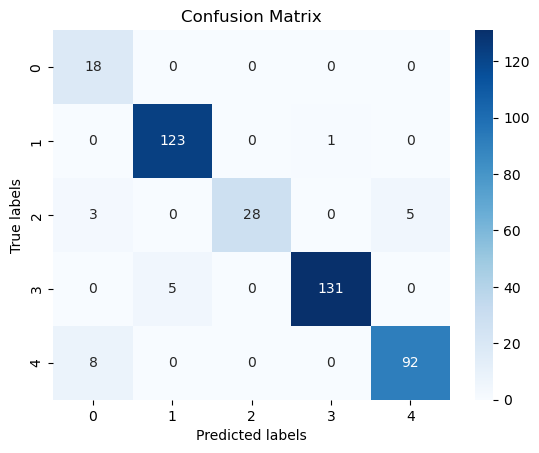

In [330]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and a subplot
fig, ax = plt.subplots()

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Add labels to the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [332]:
import matplotlib.pyplot as plt

num_classes = cm.shape[0]

for i in range(num_classes):
    # Normalize the confusion matrix
    cm_normalized = cm[i].astype('float') / cm[i].sum(axis=1)[:, np.newaxis]

    # Create a figure and a subplot
    fig, ax = plt.subplots()

    # Create a heatmap from the confusion matrix
    im = ax.imshow(cm_normalized, cmap=plt.cm.Blues)

    # Add labels to the plot
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix for Class {}'.format(i))

    # Add ticks to the plot
    ax.set_xticks(np.arange(cm_normalized.shape[1]))
    ax.set_yticks(np.arange(cm_normalized.shape[0]))

    # Add labels to the ticks
    ax.set_xticklabels(np.arange(cm_normalized.shape[1]))
    ax.set_yticklabels(np.arange(cm_normalized.shape[0]))

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    # Loop over data dimensions and create text annotations
    for j in range(cm_normalized.shape[0]):
        for k in range(cm_normalized.shape[1]):
            ax.text(k, j, format(cm_normalized[j, k], '.3f'), ha='center', va='center', color='white' if cm_normalized[j, k] > 0.5 else 'black')

    # Show the plot
    plt.show()


AxisError: axis 1 is out of bounds for array of dimension 1

In [349]:


model=Sequential()# sequential model:
#input layer
model.add(Dense(200,input_shape=(30,)))#200 tane nöron ; input shape :30(feature sayımız)
model.add(Activation('sigmoid'))
model.add(Dropout(0.7))#ezberlemesini engellemek için unutma katmanı koyuyoruz.

#first layer
model.add(Dense(400))#400 nöron
model.add(tf.keras.layers.LeakyReLU(alpha=0.01))
model.add(Dropout(0.7))
#second layer
model.add(Dense(200))#200 nöron
model.add(Activation('sigmoid'))
model.add(Dropout(0.7))
#third layer
model.add(Dense(200))#200 nöron
model.add(Activation('tanh'))
model.add(Dropout(0.7))

#output layer
model.add(Dense(num_labels))#5 çıkış olmalı 5 sınıf olduğu için
model.add(Activation('softmax'))# softmax yapıyoruz çünkü sınıfların o olma olasılıksal dağılımını bize veriyor.

In [350]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 200)               6200      
                                                                 
 activation_69 (Activation)  (None, 200)               0         
                                                                 
 dropout_59 (Dropout)        (None, 200)               0         
                                                                 
 dense_75 (Dense)            (None, 400)               80400     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 400)               0         
                                                                 
 dropout_60 (Dropout)        (None, 400)               0         
                                                                 
 dense_76 (Dense)            (None, 200)             

In [351]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
#

In [352]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 64

checkpointer = ModelCheckpoint(filepath='saved_models/drone_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)


Epoch 1/200
17/26 [==================>...........] - ETA: 0s - loss: 2.1097 - accuracy: 0.2840
Epoch 1: val_loss improved from inf to 1.29255, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 1s 9ms/step - loss: 2.0691 - accuracy: 0.2918 - val_loss: 1.2926 - val_accuracy: 0.4034
Epoch 2/200
16/26 [=================>............] - ETA: 0s - loss: 1.8676 - accuracy: 0.3350
Epoch 2: val_loss improved from 1.29255 to 1.24808, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 5ms/step - loss: 1.8258 - accuracy: 0.3372 - val_loss: 1.2481 - val_accuracy: 0.5894
Epoch 3/200
17/26 [==================>...........] - ETA: 0s - loss: 1.6954 - accuracy: 0.3961
Epoch 3: val_loss improved from 1.24808 to 0.88655, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 5ms/step - loss: 1.6137 - accuracy: 0.4092 - val_loss: 0.8865 - val_accuracy: 0.7947
Epoch 4/200

Epoch 27/200
17/26 [==================>...........] - ETA: 0s - loss: 0.3540 - accuracy: 0.8897
Epoch 27: val_loss did not improve from 0.22341
26/26 [==============================] - 0s 4ms/step - loss: 0.3434 - accuracy: 0.8910 - val_loss: 0.2274 - val_accuracy: 0.9251
Epoch 28/200
15/26 [================>.............] - ETA: 0s - loss: 0.3454 - accuracy: 0.8740
Epoch 28: val_loss improved from 0.22341 to 0.21451, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 6ms/step - loss: 0.3494 - accuracy: 0.8759 - val_loss: 0.2145 - val_accuracy: 0.9251
Epoch 29/200
14/26 [===============>..............] - ETA: 0s - loss: 0.3172 - accuracy: 0.8929
Epoch 29: val_loss improved from 0.21451 to 0.21037, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 6ms/step - loss: 0.3372 - accuracy: 0.8880 - val_loss: 0.2104 - val_accuracy: 0.9251
Epoch 30/200
15/26 [================>.............] - ETA: 0s

26/26 [==============================] - 0s 4ms/step - loss: 0.2430 - accuracy: 0.9177 - val_loss: 0.1192 - val_accuracy: 0.9614
Epoch 54/200
16/26 [=================>............] - ETA: 0s - loss: 0.2234 - accuracy: 0.9229
Epoch 54: val_loss did not improve from 0.10969
26/26 [==============================] - 0s 5ms/step - loss: 0.2404 - accuracy: 0.9189 - val_loss: 0.1116 - val_accuracy: 0.9614
Epoch 55/200
16/26 [=================>............] - ETA: 0s - loss: 0.2353 - accuracy: 0.9111
Epoch 55: val_loss improved from 0.10969 to 0.10516, saving model to saved_models\drone_classification.hdf5
26/26 [==============================] - 0s 5ms/step - loss: 0.2246 - accuracy: 0.9128 - val_loss: 0.1052 - val_accuracy: 0.9638
Epoch 56/200
16/26 [=================>............] - ETA: 0s - loss: 0.2277 - accuracy: 0.9141
Epoch 56: val_loss did not improve from 0.10516
26/26 [==============================] - 0s 4ms/step - loss: 0.2340 - accuracy: 0.9165 - val_loss: 0.1129 - val_accuracy:

17/26 [==================>...........] - ETA: 0s - loss: 0.1660 - accuracy: 0.9375
Epoch 81: val_loss did not improve from 0.08175
26/26 [==============================] - 0s 4ms/step - loss: 0.1829 - accuracy: 0.9286 - val_loss: 0.0880 - val_accuracy: 0.9638
Epoch 82/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1596 - accuracy: 0.9476
Epoch 82: val_loss did not improve from 0.08175
26/26 [==============================] - 0s 4ms/step - loss: 0.1741 - accuracy: 0.9377 - val_loss: 0.0882 - val_accuracy: 0.9638
Epoch 83/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1612 - accuracy: 0.9467
Epoch 83: val_loss did not improve from 0.08175
26/26 [==============================] - 0s 4ms/step - loss: 0.1676 - accuracy: 0.9401 - val_loss: 0.0850 - val_accuracy: 0.9710
Epoch 84/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1884 - accuracy: 0.9403
Epoch 84: val_loss improved from 0.08175 to 0.08041, saving model to saved_models\drone_classifica

Epoch 111/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1406 - accuracy: 0.9550
Epoch 111: val_loss did not improve from 0.07983
26/26 [==============================] - 0s 4ms/step - loss: 0.1525 - accuracy: 0.9467 - val_loss: 0.0840 - val_accuracy: 0.9710
Epoch 112/200
16/26 [=================>............] - ETA: 0s - loss: 0.1639 - accuracy: 0.9414
Epoch 112: val_loss did not improve from 0.07983
26/26 [==============================] - 0s 4ms/step - loss: 0.1638 - accuracy: 0.9419 - val_loss: 0.0889 - val_accuracy: 0.9710
Epoch 113/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1439 - accuracy: 0.9494
Epoch 113: val_loss did not improve from 0.07983
26/26 [==============================] - 0s 4ms/step - loss: 0.1426 - accuracy: 0.9498 - val_loss: 0.0859 - val_accuracy: 0.9710
Epoch 114/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1547 - accuracy: 0.9476
Epoch 114: val_loss did not improve from 0.07983
26/26 [======================

26/26 [==============================] - 0s 4ms/step - loss: 0.1357 - accuracy: 0.9540 - val_loss: 0.0933 - val_accuracy: 0.9710
Epoch 141/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1574 - accuracy: 0.9458
Epoch 141: val_loss did not improve from 0.07724
26/26 [==============================] - 0s 4ms/step - loss: 0.1494 - accuracy: 0.9479 - val_loss: 0.0931 - val_accuracy: 0.9710
Epoch 142/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1435 - accuracy: 0.9494
Epoch 142: val_loss did not improve from 0.07724
26/26 [==============================] - 0s 4ms/step - loss: 0.1405 - accuracy: 0.9479 - val_loss: 0.0908 - val_accuracy: 0.9710
Epoch 143/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1161 - accuracy: 0.9605
Epoch 143: val_loss did not improve from 0.07724
26/26 [==============================] - 0s 4ms/step - loss: 0.1348 - accuracy: 0.9540 - val_loss: 0.0836 - val_accuracy: 0.9710
Epoch 144/200
17/26 [==================>......

17/26 [==================>...........] - ETA: 0s - loss: 0.1404 - accuracy: 0.9485
Epoch 170: val_loss did not improve from 0.07518
26/26 [==============================] - 0s 4ms/step - loss: 0.1332 - accuracy: 0.9473 - val_loss: 0.0878 - val_accuracy: 0.9710
Epoch 171/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1476 - accuracy: 0.9494
Epoch 171: val_loss did not improve from 0.07518
26/26 [==============================] - 0s 4ms/step - loss: 0.1433 - accuracy: 0.9516 - val_loss: 0.0857 - val_accuracy: 0.9710
Epoch 172/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1459 - accuracy: 0.9531
Epoch 172: val_loss did not improve from 0.07518
26/26 [==============================] - 0s 4ms/step - loss: 0.1328 - accuracy: 0.9546 - val_loss: 0.0841 - val_accuracy: 0.9710
Epoch 173/200
18/26 [===================>..........] - ETA: 0s - loss: 0.1286 - accuracy: 0.9557
Epoch 173: val_loss did not improve from 0.07518
26/26 [==============================] - 0s

Epoch 200/200
17/26 [==================>...........] - ETA: 0s - loss: 0.1491 - accuracy: 0.9540
Epoch 200: val_loss did not improve from 0.07518
26/26 [==============================] - 0s 4ms/step - loss: 0.1494 - accuracy: 0.9504 - val_loss: 0.0974 - val_accuracy: 0.9710
Training completed in time:  0:00:24.494853


In [353]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9710144996643066


In [358]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

13/13 [==============================] - 0s 1ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

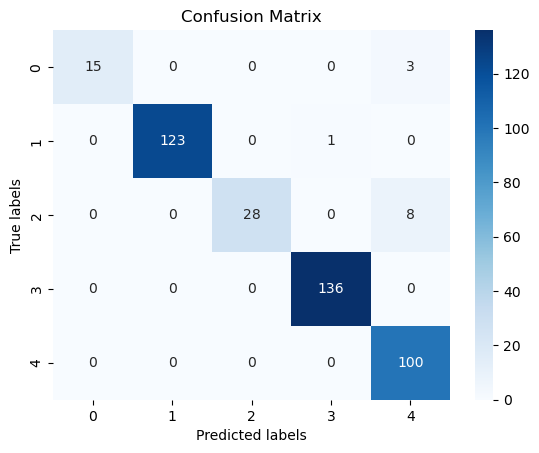

In [359]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and a subplot
fig, ax = plt.subplots()

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Add labels to the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [360]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       1.00      0.99      1.00       124
           2       1.00      0.78      0.88        36
           3       0.99      1.00      1.00       136
           4       0.90      1.00      0.95       100

    accuracy                           0.97       414
   macro avg       0.98      0.92      0.94       414
weighted avg       0.97      0.97      0.97       414



In [361]:
import matplotlib.pyplot as plt

num_classes = cm.shape[0]

for i in range(num_classes):
    # Normalize the confusion matrix
    cm_normalized = cm[i].astype('float') / cm[i].sum(axis=1)[:, np.newaxis]

    # Create a figure and a subplot
    fig, ax = plt.subplots()

    # Create a heatmap from the confusion matrix
    im = ax.imshow(cm_normalized, cmap=plt.cm.Blues)

    # Add labels to the plot
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix for Class {}'.format(i))

    # Add ticks to the plot
    ax.set_xticks(np.arange(cm_normalized.shape[1]))
    ax.set_yticks(np.arange(cm_normalized.shape[0]))

    # Add labels to the ticks
    ax.set_xticklabels(np.arange(cm_normalized.shape[1]))
    ax.set_yticklabels(np.arange(cm_normalized.shape[0]))

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    # Loop over data dimensions and create text annotations
    for j in range(cm_normalized.shape[0]):
        for k in range(cm_normalized.shape[1]):
            ax.text(k, j, format(cm_normalized[j, k], '.3f'), ha='center', va='center', color='white' if cm_normalized[j, k] > 0.5 else 'black')

    # Show the plot
    plt.show()


AxisError: axis 1 is out of bounds for array of dimension 1

In [362]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report




scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))


C:\Users\ninja\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [363]:
# Calculate the accuracy
accuracy = (y_test == y_pred).mean()
print(f'Accuracy: {accuracy:.4f}')


C:\Users\ninja\AppData\Local\Temp\ipykernel_21872\891254633.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = (y_test == y_pred).mean()


AttributeError: 'bool' object has no attribute 'mean'

In [364]:
from sklearn.metrics import multilabel_confusion_matrix

# Calculate the confusion matrix for each label
matrices = multilabel_confusion_matrix(y_test, y_pred)

# Loop over each label
for i, matrix in enumerate(matrices):
    # Normalize the confusion matrix
    cm_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Create a figure and a subplot
    fig, ax = plt.subplots()

    # Create a heatmap from the confusion matrix
    im = ax.imshow(cm_normalized, cmap=plt.cm.Blues)

    # Add labels to the plot
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix for Class {}'.format(i))

    # Add ticks to the plot
    ax.set_xticks(np.arange(cm_normalized.shape[1]))
    ax.set_yticks(np.arange(cm_normalized.shape[0]))

    # Add labels to the ticks
    ax.set_xticklabels(np.arange(cm_normalized.shape[1]))
    ax.set_yticklabels(np.arange(cm_normalized.shape[0]))

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    # Loop over data dimensions and create text annotations
    for j in range(cm_normalized.shape[0]):
        for k in range(cm_normalized.shape[1]):
            ax.text(k, j, format(cm_normalized[j, k], '.3f'), ha='center', va='center', color='white' if cm_normalized[j, k] > 0.5 else 'black')

    # Show the plot
    plt.show()


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [365]:


# Calculate the confusion matrix
matrix = multilabel_confusion_matrix(y_test, y_pred)
print(matrix)


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [366]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and a subplot
fig, ax = plt.subplots()

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Add labels to the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [367]:
from sklearn.svm import SVC

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))


ValueError: y should be a 1d array, got an array of shape (1652, 5) instead.

In [187]:
# Calculate the accuracy
accuracy = (y_test == y_pred).mean()
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9734


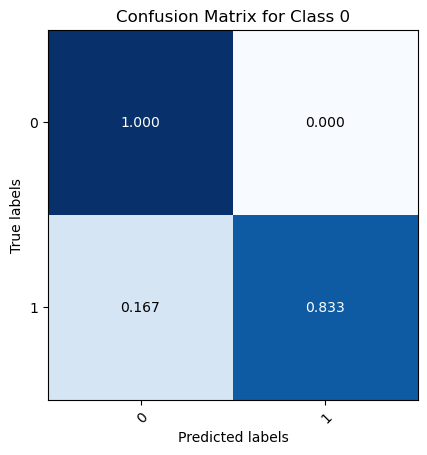

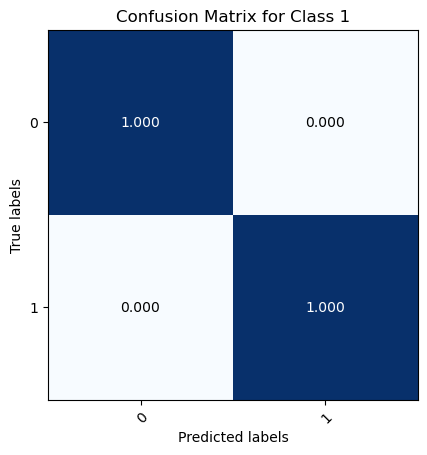

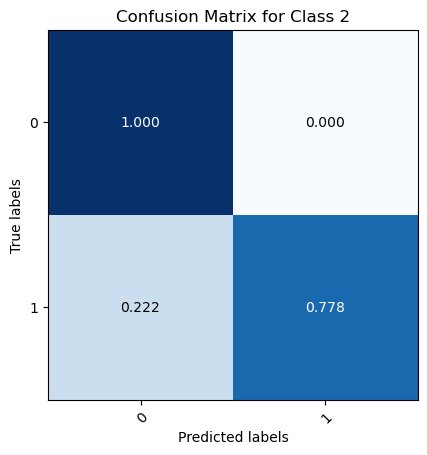

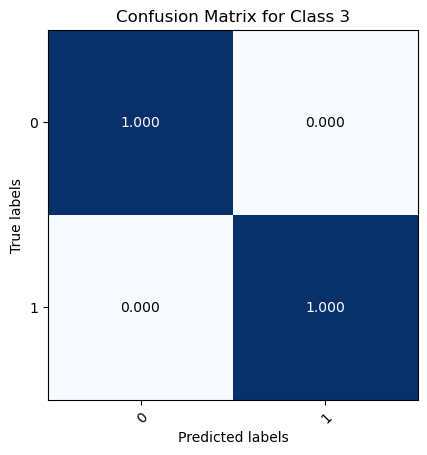

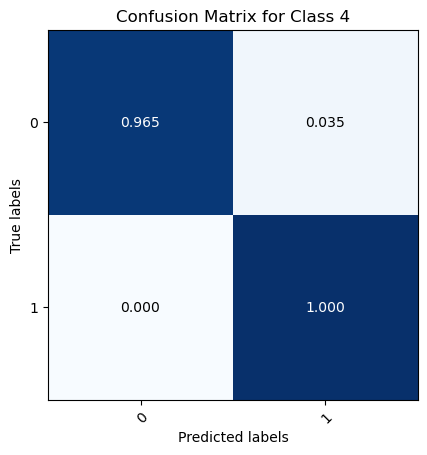

In [188]:
from sklearn.metrics import multilabel_confusion_matrix

# Calculate the confusion matrix for each label
matrices = multilabel_confusion_matrix(y_test, y_pred)

# Loop over each label
for i, matrix in enumerate(matrices):
    # Normalize the confusion matrix
    cm_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Create a figure and a subplot
    fig, ax = plt.subplots()

    # Create a heatmap from the confusion matrix
    im = ax.imshow(cm_normalized, cmap=plt.cm.Blues)

    # Add labels to the plot
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix for Class {}'.format(i))

    # Add ticks to the plot
    ax.set_xticks(np.arange(cm_normalized.shape[1]))
    ax.set_yticks(np.arange(cm_normalized.shape[0]))

    # Add labels to the ticks
    ax.set_xticklabels(np.arange(cm_normalized.shape[1]))
    ax.set_yticklabels(np.arange(cm_normalized.shape[0]))

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    # Loop over data dimensions and create text annotations
    for j in range(cm_normalized.shape[0]):
        for k in range(cm_normalized.shape[1]):
            ax.text(k, j, format(cm_normalized[j, k], '.3f'), ha='center', va='center', color='white' if cm_normalized[j, k] > 0.5 else 'black')

    # Show the plot
    plt.show()


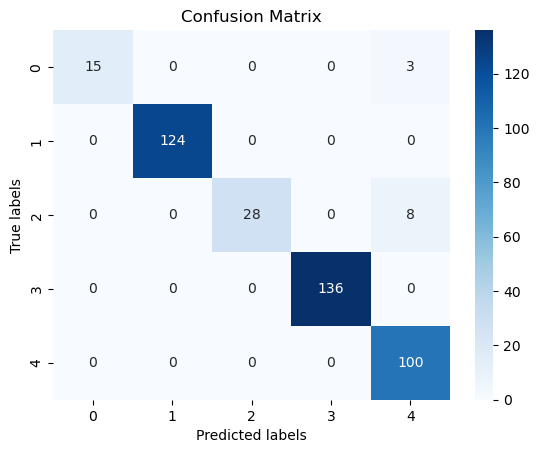

In [189]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and a subplot
fig, ax = plt.subplots()

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Add labels to the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [357]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


print(classification_report(y_test, y_pred))


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [183]:
# Calculate the accuracy
accuracy = (y_test == y_pred).mean()
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9251


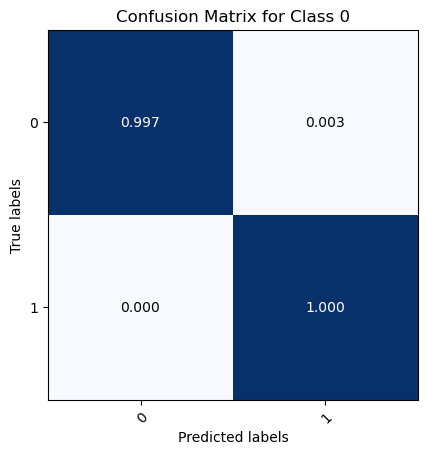

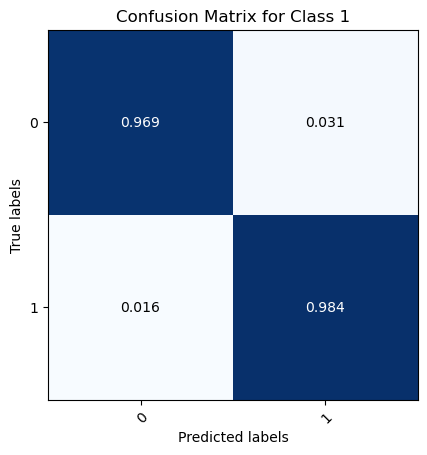

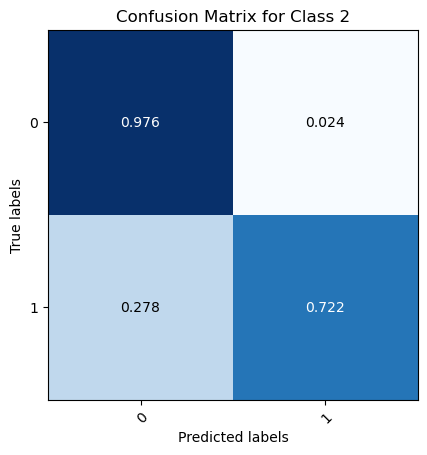

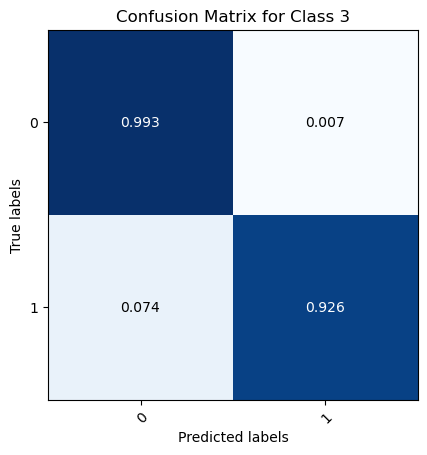

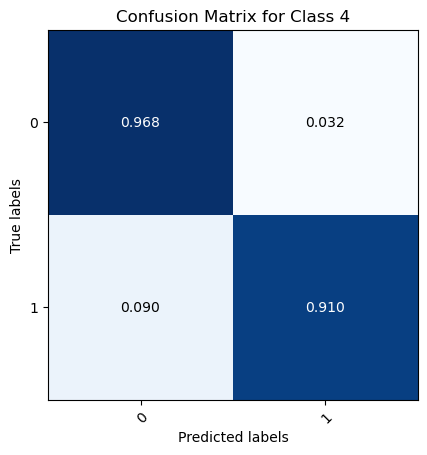

In [184]:
from sklearn.metrics import multilabel_confusion_matrix

# Calculate the confusion matrix for each label
matrices = multilabel_confusion_matrix(y_test, y_pred)

# Loop over each label
for i, matrix in enumerate(matrices):
    # Normalize the confusion matrix
    cm_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Create a figure and a subplot
    fig, ax = plt.subplots()

    # Create a heatmap from the confusion matrix
    im = ax.imshow(cm_normalized, cmap=plt.cm.Blues)

    # Add labels to the plot
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix for Class {}'.format(i))

    # Add ticks to the plot
    ax.set_xticks(np.arange(cm_normalized.shape[1]))
    ax.set_yticks(np.arange(cm_normalized.shape[0]))

    # Add labels to the ticks
    ax.set_xticklabels(np.arange(cm_normalized.shape[1]))
    ax.set_yticklabels(np.arange(cm_normalized.shape[0]))

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    # Loop over data dimensions and create text annotations
    for j in range(cm_normalized.shape[0]):
        for k in range(cm_normalized.shape[1]):
            ax.text(k, j, format(cm_normalized[j, k], '.3f'), ha='center', va='center', color='white' if cm_normalized[j, k] > 0.5 else 'black')

    # Show the plot
    plt.show()


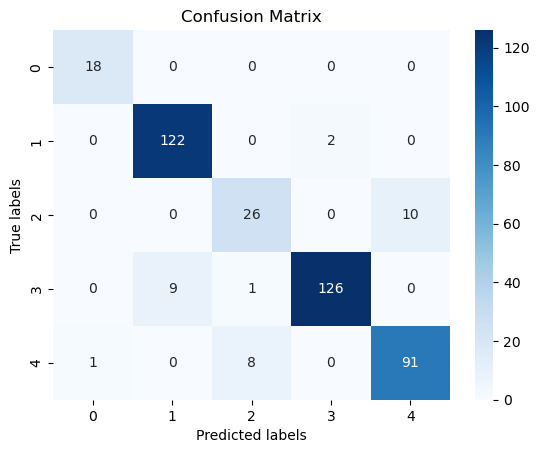

In [185]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and a subplot
fig, ax = plt.subplots()

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Add labels to the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()


In [33]:
filename="jackal_noisy26.wav"
data_droning,sr=librosa.load(filename)
ipd.Audio(filename)

In [572]:
mfccs_features_denemes=(librosa.feature.mfcc(y=data_droning,sr=sr,n_mfcc=30))
mfccs_scaled_feature__denemes=(np.mean(mfccs_features_denemes,axis=1))

In [573]:
mfccs_features_denemes.shape

(30, 45)

In [574]:
mfccs_features_denemes

array([[41.97883   , 73.69466   , 74.9012    , ..., 78.51949   ,
        75.766174  , 45.68298   ],
       [-0.5719783 , -2.1860929 , -0.34584618, ...,  0.41604954,
        -1.2884126 ,  3.1745887 ],
       [-5.6615644 , -5.135492  , -3.4568107 , ..., -3.1379108 ,
        -3.7222912 ,  2.4511006 ],
       ...,
       [ 5.7322965 ,  6.1570215 ,  2.9056187 , ...,  2.9730844 ,
         1.4724731 ,  0.43767655],
       [-4.8664694 , -3.2869604 , -0.32185334, ..., -2.706171  ,
        -0.26588643, -3.873777  ],
       [ 0.9148673 , -1.5890677 ,  6.0984344 , ...,  2.698835  ,
         6.6156764 ,  7.5869207 ]], dtype=float32)

In [575]:
np.mean(mfccs_features_denemes[0])


74.807236

In [576]:
np.mean(mfccs_features_denemes[1])

-0.19569567

In [577]:
mfccs_scaled_feature__denemes

array([74.807236  , -0.19569567, -3.2628376 ,  3.3957875 , -2.6396616 ,
        3.2460437 , -1.7682661 ,  4.071555  , -2.8506901 ,  2.8388271 ,
       -1.7635593 ,  3.2329414 , -1.5839976 ,  4.011945  , -2.64492   ,
        2.5279455 , -2.1222498 ,  3.309971  , -2.8392246 ,  1.7013217 ,
       -3.0486572 ,  2.9433885 , -2.9671316 ,  1.3670653 , -4.591096  ,
        1.0542947 , -1.862831  ,  3.2537534 , -2.7720282 ,  2.1699703 ],
      dtype=float32)

In [578]:
mfccs_scaled_feature__denemes.shape

(30,)

In [579]:
#np.mean(mfccs_features_denemes,axis=1)

In [580]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

(30, 45)

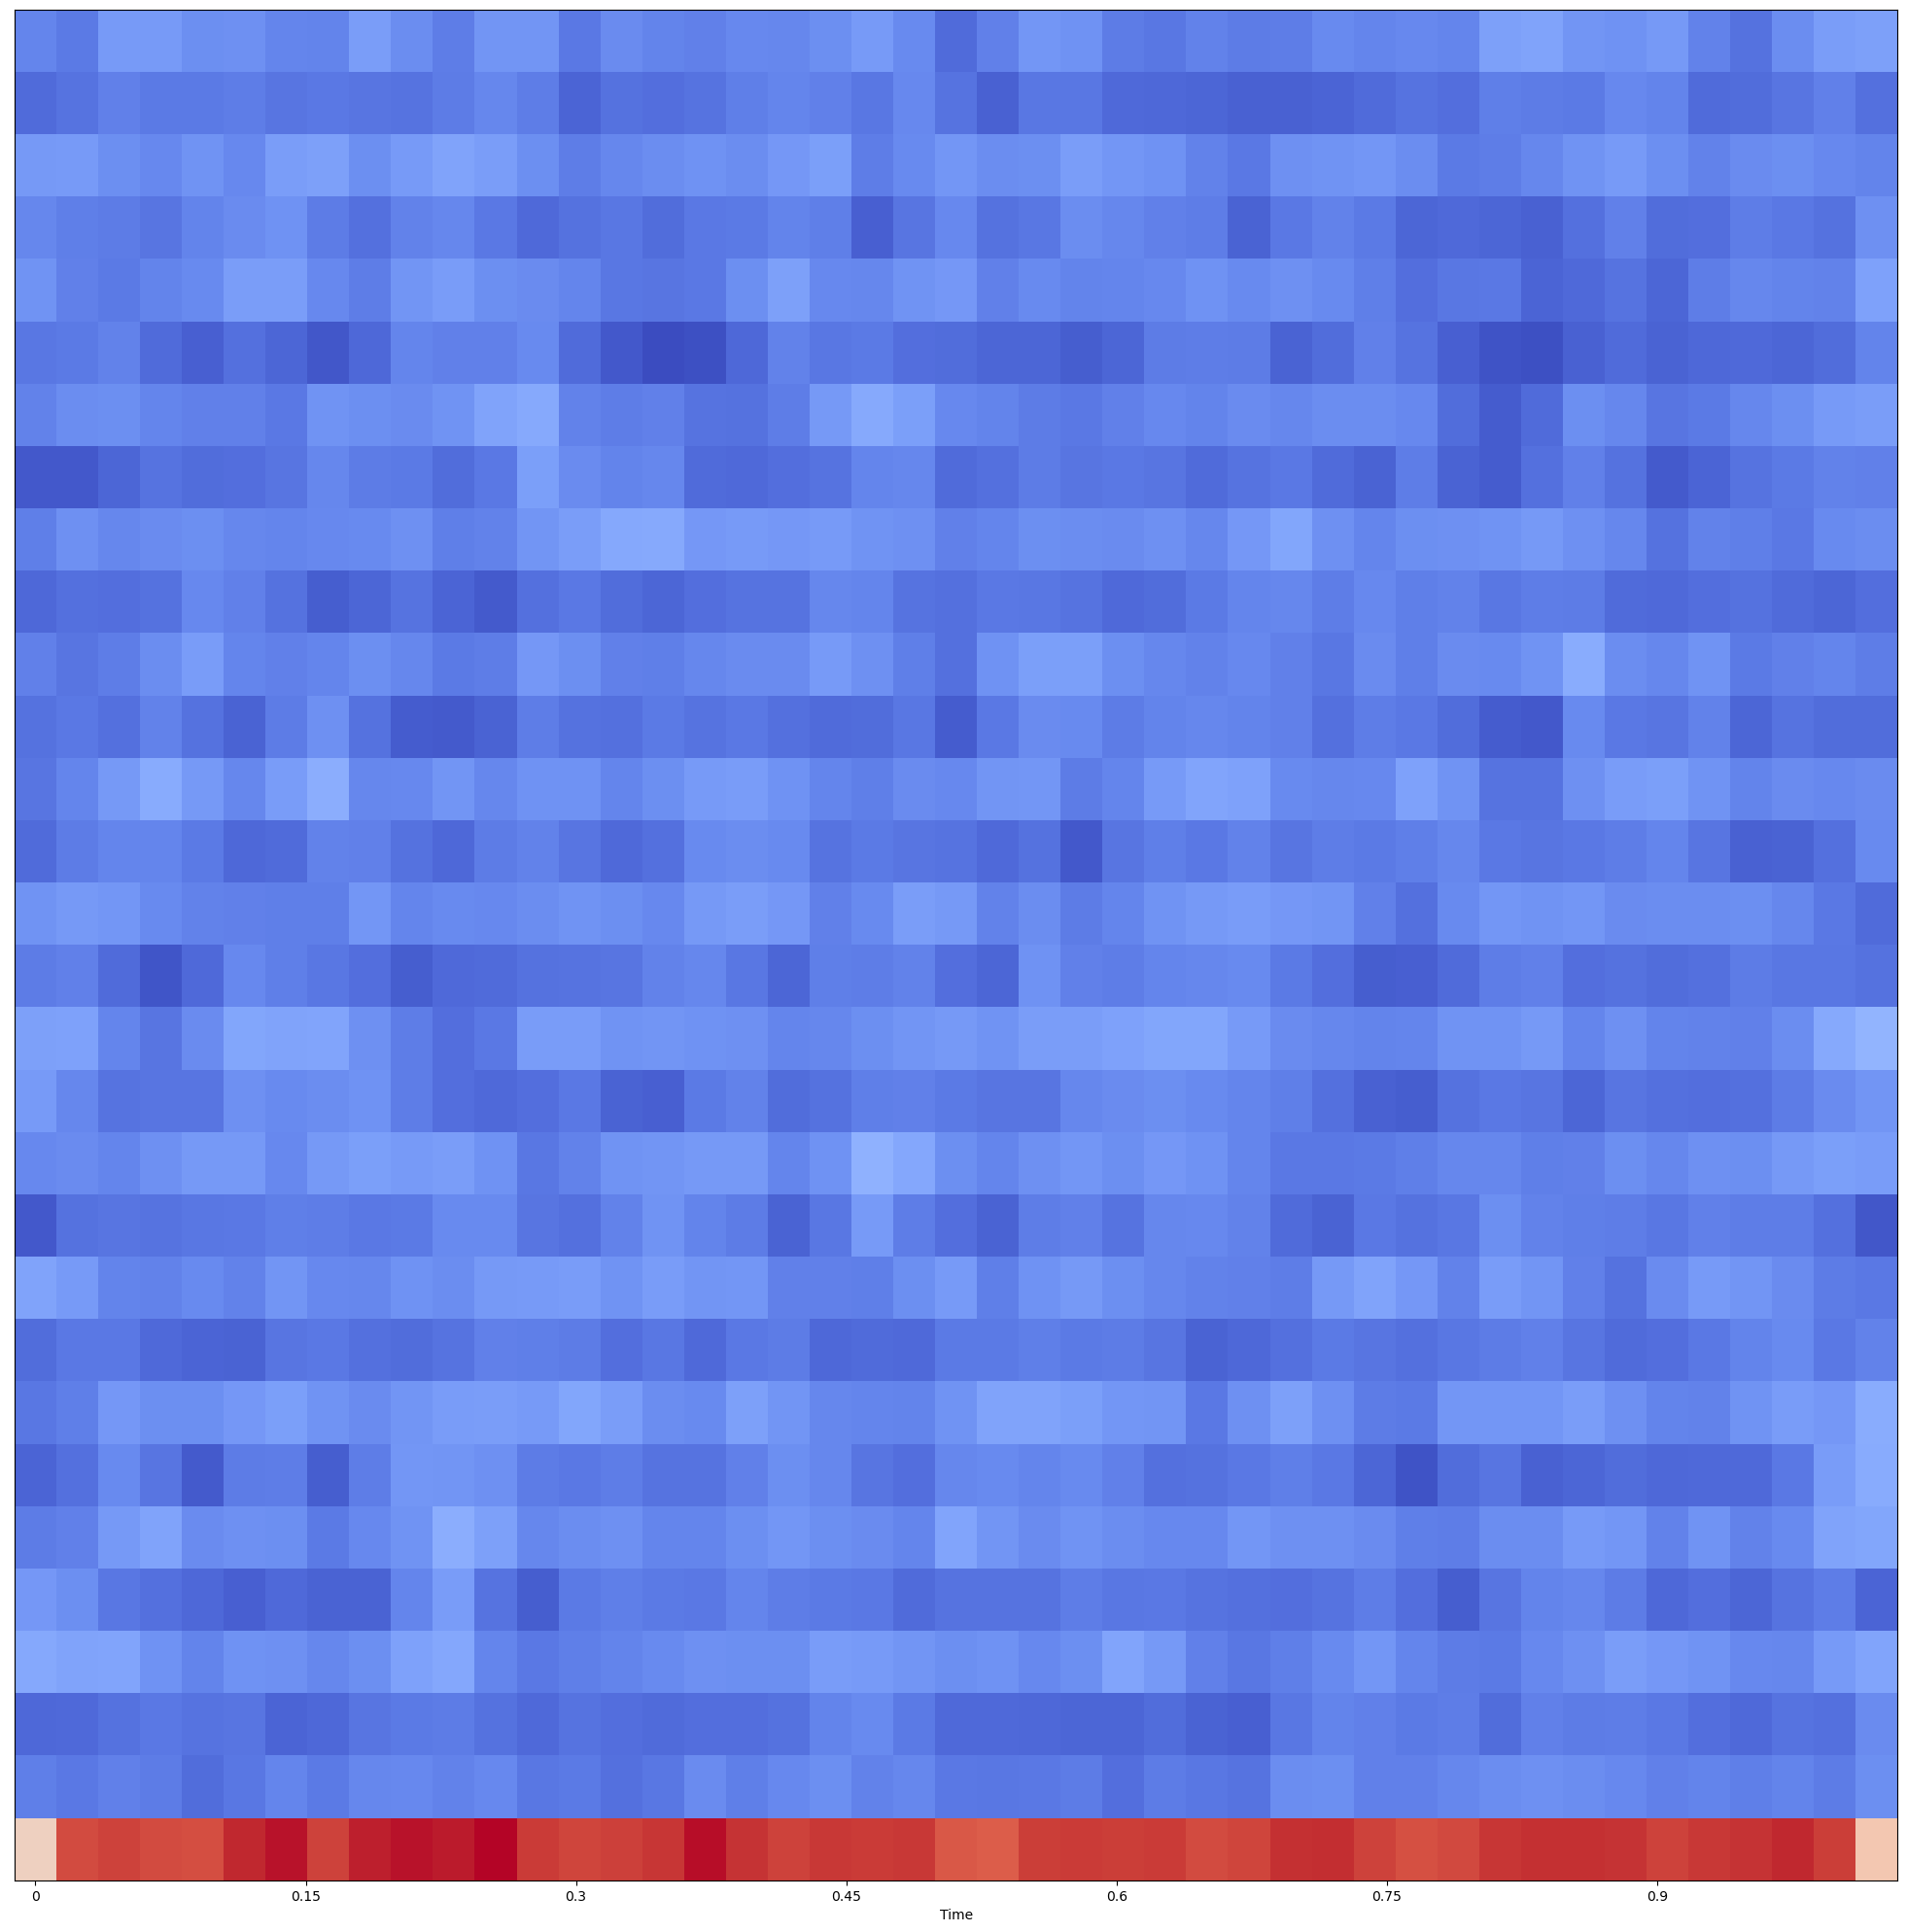

In [581]:
time="time"
plt.figure(figsize=(25,25))
librosa.display.specshow(mfccs_features_denemes,
                        x_axis=time,
                        sr=sr)

mfccs_features_denemes.shape

In [582]:
mfccs_scaled_feature__denemes.shape

(30,)

In [583]:
mfccs_scaled_feature__denemes

array([74.807236  , -0.19569567, -3.2628376 ,  3.3957875 , -2.6396616 ,
        3.2460437 , -1.7682661 ,  4.071555  , -2.8506901 ,  2.8388271 ,
       -1.7635593 ,  3.2329414 , -1.5839976 ,  4.011945  , -2.64492   ,
        2.5279455 , -2.1222498 ,  3.309971  , -2.8392246 ,  1.7013217 ,
       -3.0486572 ,  2.9433885 , -2.9671316 ,  1.3670653 , -4.591096  ,
        1.0542947 , -1.862831  ,  3.2537534 , -2.7720282 ,  2.1699703 ],
      dtype=float32)

In [584]:
prediction1_feature=mfccs_scaled_feature__denemes.reshape(1,-1)

In [585]:
prediction1_feature.shape

(1, 30)

In [586]:
prediction1_feature

array([[74.807236  , -0.19569567, -3.2628376 ,  3.3957875 , -2.6396616 ,
         3.2460437 , -1.7682661 ,  4.071555  , -2.8506901 ,  2.8388271 ,
        -1.7635593 ,  3.2329414 , -1.5839976 ,  4.011945  , -2.64492   ,
         2.5279455 , -2.1222498 ,  3.309971  , -2.8392246 ,  1.7013217 ,
        -3.0486572 ,  2.9433885 , -2.9671316 ,  1.3670653 , -4.591096  ,
         1.0542947 , -1.862831  ,  3.2537534 , -2.7720282 ,  2.1699703 ]],
      dtype=float32)

In [587]:
model.predict(prediction1_feature)

1/1 [==============================] - 0s 44ms/step


array([[0.21253583, 0.01337177, 0.21830049, 0.01888857, 0.53690326]],
      dtype=float32)

In [588]:
goodgame=model.predict(prediction1_feature)

1/1 [==============================] - 0s 14ms/step


In [589]:
class_names = ["altı","bebop","savunma","membo","jackal"]

In [590]:
class_names[np.argmax(goodgame)]

'jackal'

In [591]:
os.getcwd()

'C:\\Users\\ninja\\Desktop\\datasets'

In [534]:
denemecikler=X_test[130]

In [535]:
y_test[130]

array([1, 0, 0, 0, 0], dtype=uint8)

In [536]:
goodgame=model.predict(denemecikler.reshape(1,-1))

1/1 [==============================] - 0s 14ms/step


In [537]:
class_names[np.argmax(goodgame)]

'altı'

In [538]:
goodgame

array([[1.0000000e+00, 3.8609645e-24, 3.6550975e-24, 3.1580252e-10,
        4.4191980e-11]], dtype=float32)

In [539]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 24C6-591C

 Directory of C:\Users\ninja\Desktop\datasets

27.12.2022  02:19    <DIR>          .
27.12.2022  02:19    <DIR>          ..
25.12.2022  19:44    <DIR>          .ipynb_checkpoints
25.12.2022  10:02    <DIR>          6 pervaneli
24.12.2022  20:06    <DIR>          bebop
25.12.2022  01:38    <DIR>          drone 4 kanat
26.12.2022  20:55    <DIR>          drone_4_not_in
25.12.2022  11:34           299.401 drone_datas.csv
26.12.2022  22:30           955.997 drone_day_25.ipynb
26.12.2022  23:22        13.512.144 droning.wav
25.12.2022  11:09    <DIR>          jackal
25.12.2022  00:45           180.676 jackal_noisy26.wav
25.12.2022  09:43    <DIR>          membo
25.12.2022  13:03           871.561 sade_df.csv
25.12.2022  19:16           363.248 sade_numpy.npy
26.12.2022  00:54    <DIR>          saved_models
27.12.2022  02:19           390.336 sunuming.ipynb
25.12.2022  01:32               115 Ÿimdi.txt
26.12.2022  00:00    